In [1]:
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM
from rmgpy import settings
import time
import matplotlib.pyplot as plt
import matplotlib

In [2]:
settings

{'database.directory': '/home/khalil.nor/Code/RMG-database/input',
 'test_data.directory': '/home/khalil.nor/Code/RMG-Py/rmgpy/test_data'}

In [ ]:
#these families just had training rxns added to them 

#dict_keys(['1,2_Insertion_carbene', 'R_Addition_MultipleBond', 'XY_Addition_MultipleBond', 'Singlet_Carbene_Intra_Disproportionation', '1,2_Insertion_CO', '1+2_Cycloaddition', '1,3_Insertion_CO2', '1,3_sigmatropic_rearrangement'])

In [3]:
thermo_libs = [
'PFCA_thermo',
'C1_C2_Fluorine', #adding Siddha's as first most trusted because this is the thermo library that Franklin used
'NCSU_C2_C8_PFAS', #adding Westmoreland's thermo as the second most trusted
'primaryThermoLibrary',
'Fluorine',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

kin_families = ['R_Recombination', '1,2_Insertion_carbene', 'F_Abstraction', 'R_Addition_MultipleBond', 'XY_Addition_MultipleBond', 'Singlet_Carbene_Intra_Disproportionation', 'Intra_R_Add_Endocyclic', 'R_Addition_COm', '1,2_Insertion_CO', '1+2_Cycloaddition', '1,3_Insertion_CO2', '1,3_sigmatropic_rearrangement']


In [4]:
database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = thermo_libs,
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = kin_families,
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )


In [ ]:
database.kinetics.families

In [6]:
# 'Intra_R_Add_Endocyclic' 
family_to_train = "Intra_R_Add_Endocyclic"
family = database.kinetics.families[family_to_train]

In [7]:
family.clean_tree()

In [8]:
start = time.time()
family.generate_tree(thermo_database=database.thermo,
                     nprocs=1,
                     new_fraction_threshold_to_reopt_node=0.25,
                     max_batch_size=800,
                     extension_iter_max=2,
                     extension_iter_item_cap=100)

end = time.time()
print(end-start)

ERROR:root:getting reaction matches
ERROR:root:building tree with 800 rxns
ERROR:root:800.0
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:Recursion item cap hit not splitting 3 reactions at iter 4 with 114 items
ERROR:root:Recursion item cap hit not splitting 2 reactions at iter 4 with 120 items
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved term

730.9217085838318


In [9]:
len(family.groups.entries)

1029

In [10]:
family.groups.entries

{'RnCyclic': <Entry index=-1 label="RnCyclic">,
 'Root': <Entry index=0 label="Root">,
 'Root_1R-inRing': <Entry index=1 label="Root_1R-inRing">,
 'Root_N-1R-inRing': <Entry index=2 label="Root_N-1R-inRing">,
 'Root_1R-inRing_2R->C': <Entry index=3 label="Root_1R-inRing_2R->C">,
 'Root_1R-inRing_N-2R->C': <Entry index=4 label="Root_1R-inRing_N-2R->C">,
 'Root_N-1R-inRing_3R->O': <Entry index=5 label="Root_N-1R-inRing_3R->O">,
 'Root_N-1R-inRing_N-3R->O': <Entry index=6 label="Root_N-1R-inRing_N-3R->O">,
 'Root_1R-inRing_2R->C_Int-3R-1R': <Entry index=7 label="Root_1R-inRing_2R->C_Int-3R-1R">,
 'Root_1R-inRing_2R->C_Ext-3R-R_Ext-1R-R_Ext-3R-R_Int-5R!H-4R!H': <Entry index=8 label="Root_1R-inRing_2R->C_Ext-3R-R_Ext-1R-R_Ext-3R-R_Int-5R!H-4R!H">,
 'Root_1R-inRing_2R->C_Ext-3R-R_4R!H-inRing': <Entry index=9 label="Root_1R-inRing_2R->C_Ext-3R-R_4R!H-inRing">,
 'Root_1R-inRing_2R->C_Ext-3R-R_N-4R!H-inRing': <Entry index=10 label="Root_1R-inRing_2R->C_Ext-3R-R_N-4R!H-inRing">,
 'Root_N-1R-inRi

In [11]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

1.0015347003936768


In [12]:
start = time.time()
family.regularize(thermo_database=database.thermo)
end = time.time()
print(end-start)

152.42345690727234


In [13]:
start = time.time()
templateRxnMap = family.get_reaction_matches(thermo_database=database.thermo,remove_degeneracy=True,
                                             get_reverse=True,exact_matches_only=False,fix_labels=True)
end = time.time()
print(end-start)

148.74062943458557


In [14]:
len(templateRxnMap)

1029

In [15]:
family.clean_tree_rules()

In [16]:
start = time.time()
family.make_bm_rules_from_template_rxn_map(templateRxnMap)#,nprocs=6)
end = time.time()
print(end-start)

/home/khalil.nor/Code/RMG-Py/rmgpy/data/kinetics/family.py:3617: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for rxns, label in rxnlists])
/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


768.2011225223541


In [17]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

1.0069198608398438


In [18]:
start = time.time()
errors,uncertainties = family.cross_validate(iters=0,random_state=5,folds=0,ascend=False)
end = time.time()
print(end-start)

/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


155.07473015785217


In [19]:
save_path = os.path.join(settings['database.directory'], 'kinetics', 'families', family.name)
print(save_path)

/home/khalil.nor/Code/RMG-database/input/kinetics/families/Intra_R_Add_Endocyclic


In [20]:
family.save(save_path)

In [ ]:
#completed on May 29thth, 2024 at 11:29 am. Successfully autogenerated after editing ArrBM fitting.

In [ ]:
#let's check to see what the fit is like at the end nodes

In [1]:
from rmgpy.kinetics.uncertainties import RateUncertainty
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM, Arrhenius
from rmgpy import settings
import time
import matplotlib.pyplot as plt
import matplotlib
import rmgpy.constants as constants

In [2]:
thermo_libs = [
#'PFCA_thermo', this was not added for this family yet
'C1_C2_Fluorine', #adding Siddha's as first most trusted because this is the thermo library that Franklin used
'NCSU_C2_C8_PFAS', #adding Westmoreland's thermo as the second most trusted
'primaryThermoLibrary',
'Fluorine',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

kin_families = ["Intra_R_Add_Endocyclic"]

database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = thermo_libs,
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = kin_families,
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )

In [3]:
database.kinetics.families

{'Intra_R_Add_Endocyclic': <ReactionFamily "Intra_R_Add_Endocyclic">}

In [4]:
# "1,2_Insertion_CO" 
family_to_train = "Intra_R_Add_Endocyclic"
family = database.kinetics.families[family_to_train]

In [5]:
start = time.time()
templateRxnMap = family.get_reaction_matches(thermo_database=database.thermo,remove_degeneracy=True,
                                             get_reverse=True,exact_matches_only=False,fix_labels=True)
end = time.time()
print(end-start)

395.6415364742279


In [7]:
n_2_mapping = [key for key, value in templateRxnMap.items() if len(value)==2] #mapping of all nodes with 3 or less training rxns (parents)
n_1_mapping = [key for key, value in templateRxnMap.items() if len(value)==1] #mapping of all nodes with 1 training rxn (children)
n_4_mapping = [key for key, value in templateRxnMap.items() if len(value)==4] 
parent_to_child = {}
parent_to_child_4 = {}

for label in n_2_mapping: 
    
    #make the parent node
    parent_node, _ = family.retrieve_original_entry(label)
    
    #now find the children with just 1 reaction
    children_nodes = []
    for test_label in n_1_mapping:
        if label in test_label:
            child_node, _ = family.retrieve_original_entry(test_label)
            children_nodes.append(child_node)
            
            
    if len(templateRxnMap[label])==len(children_nodes): #let's pick out the ones that are both two
        parent_to_child[parent_node.label] = [x.label for x in children_nodes]
        
for label in n_4_mapping: 
    
    #make the parent node
    parent_node, _ = family.retrieve_original_entry(label)
    
    #now find the children with just 1 reaction
    children_nodes = []
    for test_label in n_1_mapping:
        if label in test_label:
            child_node, _ = family.retrieve_original_entry(test_label)
            children_nodes.append(child_node)
            
            
    if len(templateRxnMap[label])==len(children_nodes): #let's pick out the ones that are both two
        parent_to_child_4[parent_node.label] = [x.label for x in children_nodes]
#parent_to_child is a dictionary where key = label of parent and value = label of children

C7H9-45 <=> C7H9-46
C6H5O2-7 <=> C6H5O2-8
8.11e+10 s^-1 8.11e+10 s^-1


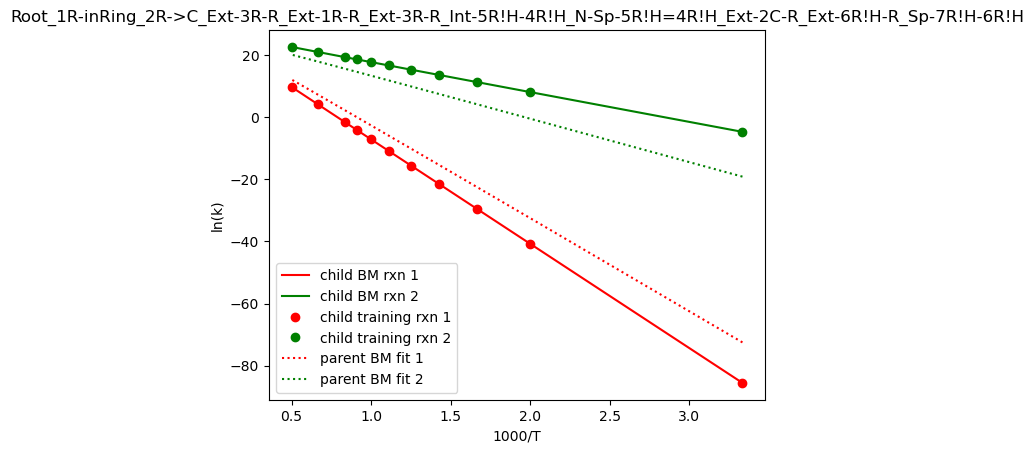

C9H11 <=> C9H11-2
C6H5O2 <=> C6H5O2-2
5.81e+08 s^-1 5.81e+08 s^-1


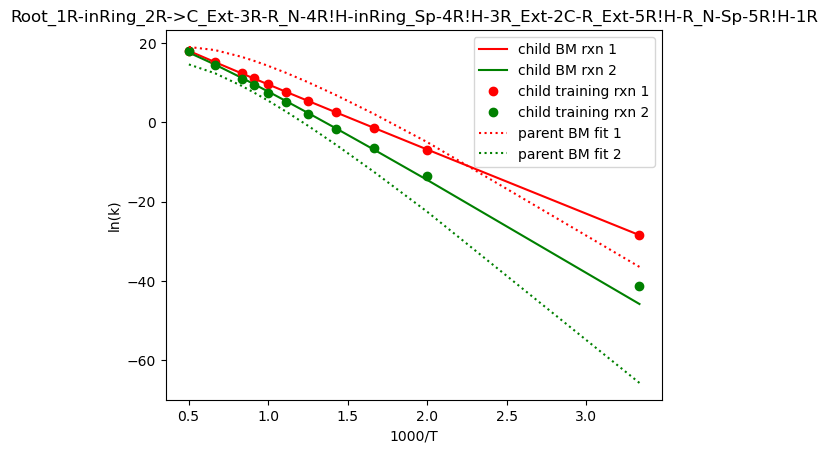

C12H17-37 <=> C12H17-38
C12H15-27 <=> C12H15-28
7.6e+10 s^-1 7.6e+10 s^-1


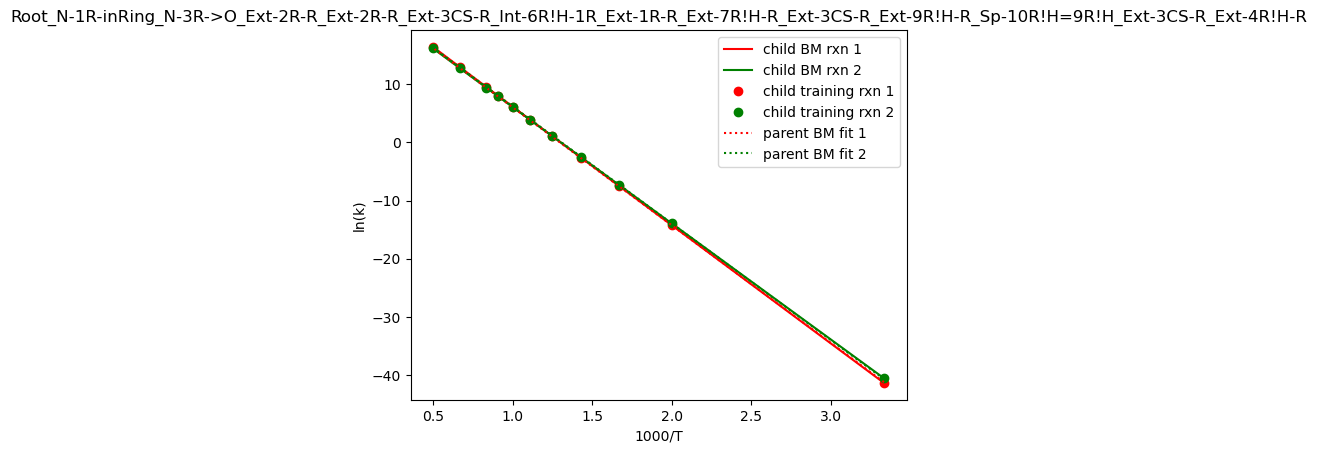

C11H15-59 <=> C11H15-60
C11H13-33 <=> C11H13-34
2.68e+11 s^-1 2.68e+11 s^-1


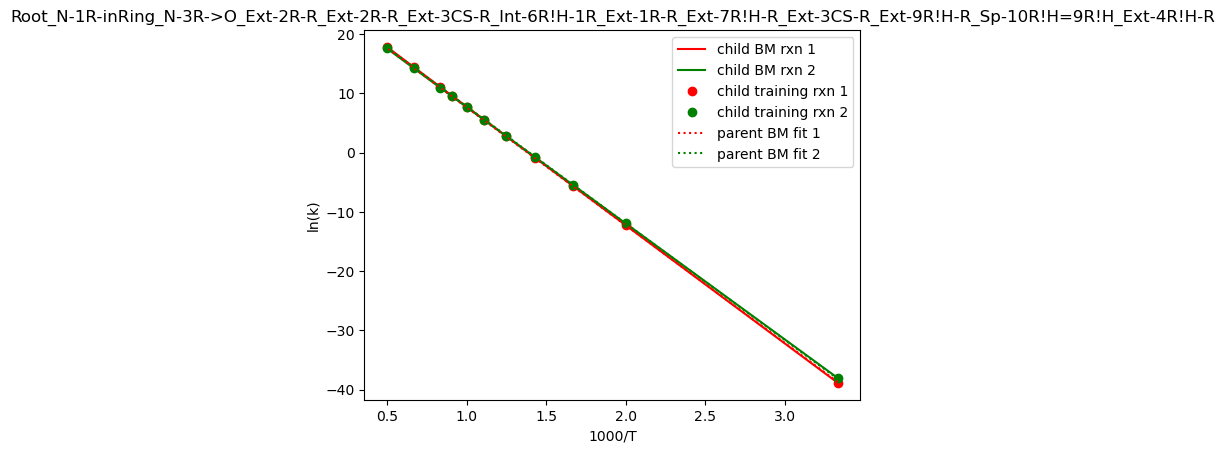

C12H15-25 <=> C12H15-26
C12H13-9 <=> C12H13-10
1.2e+11 s^-1 1.2e+11 s^-1


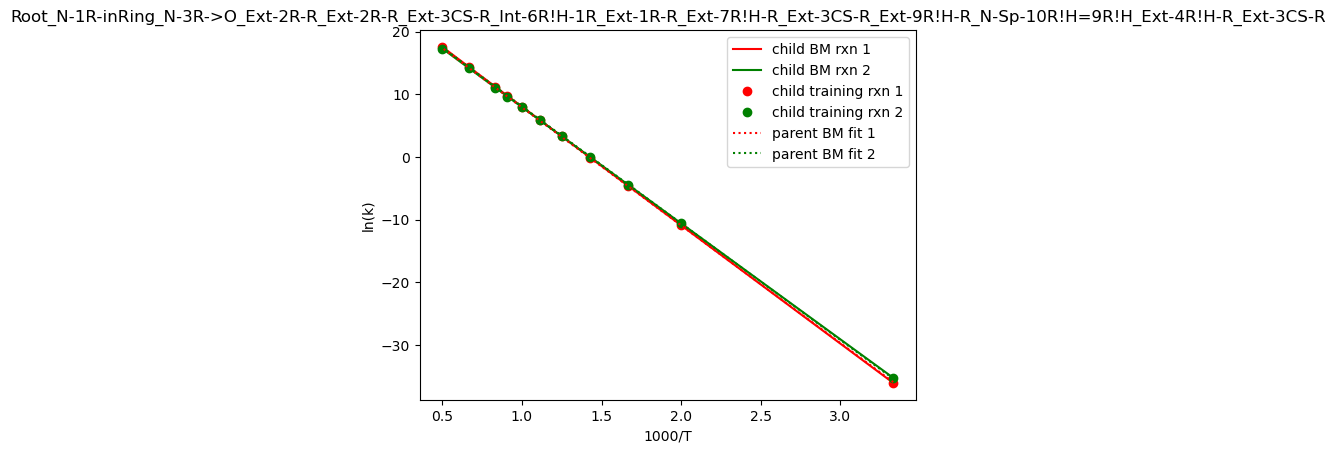

C11H17-53 <=> C11H17-54
C11H15-61 <=> C11H15-62
5.77e+10 s^-1 5.77e+10 s^-1


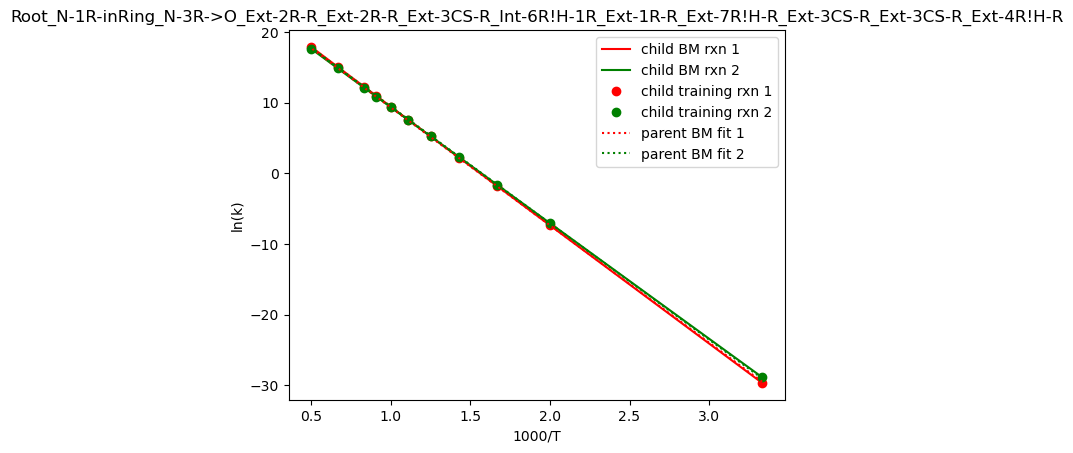

C10H15-73 <=> C10H15-74
C10H13-59 <=> C10H13-60
2.3e+11 s^-1 2.3e+11 s^-1


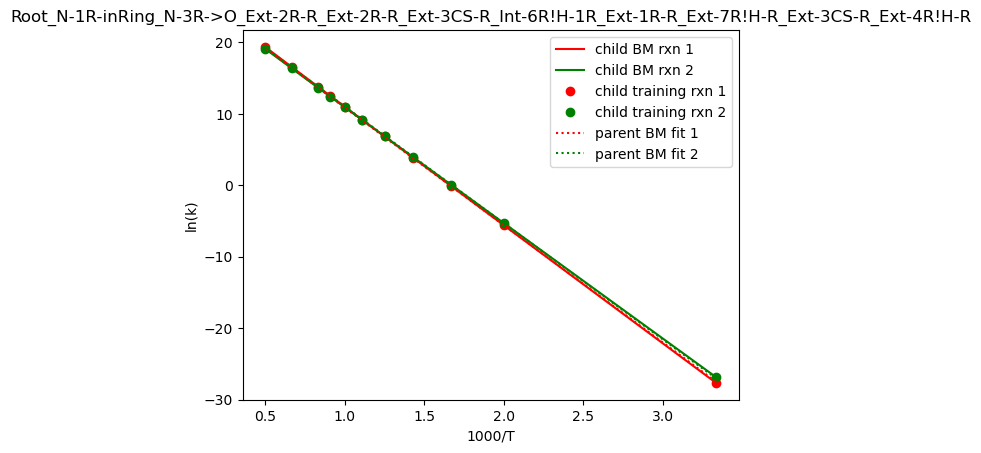

C9H13-67 <=> C9H13-68
C9H11-41 <=> C9H11-42
3.17e+10 s^-1 3.17e+10 s^-1


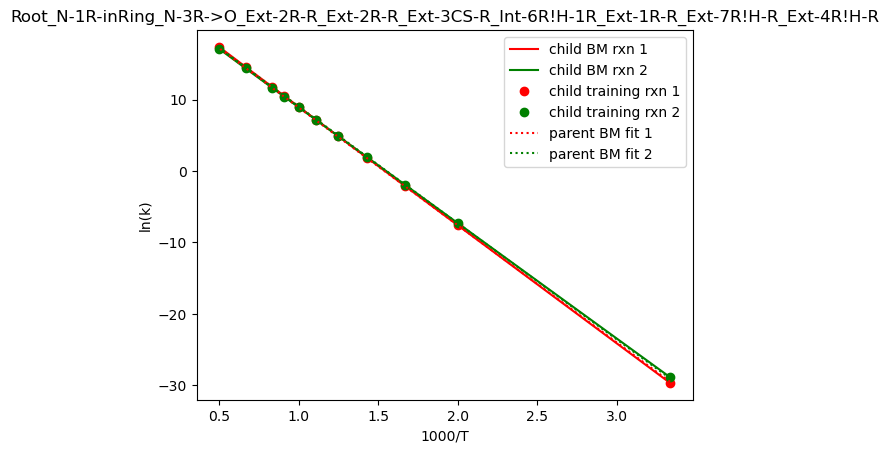

C11H17-25 <=> C11H17-26
C11H15-27 <=> C11H15-28
7.27e+10 s^-1 7.27e+10 s^-1


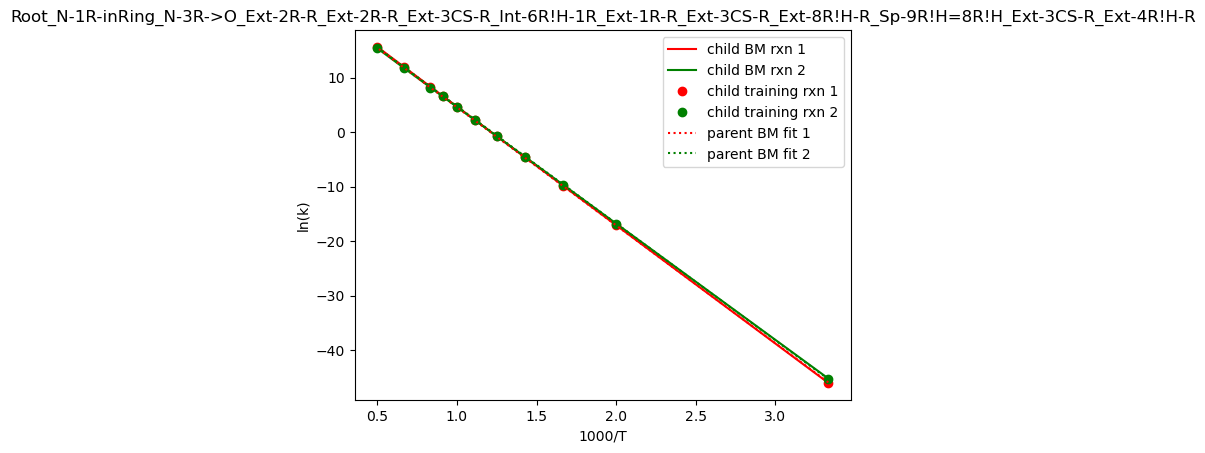

C10H15-41 <=> C10H15-42
C10H13-33 <=> C10H13-34
2.57e+11 s^-1 2.57e+11 s^-1


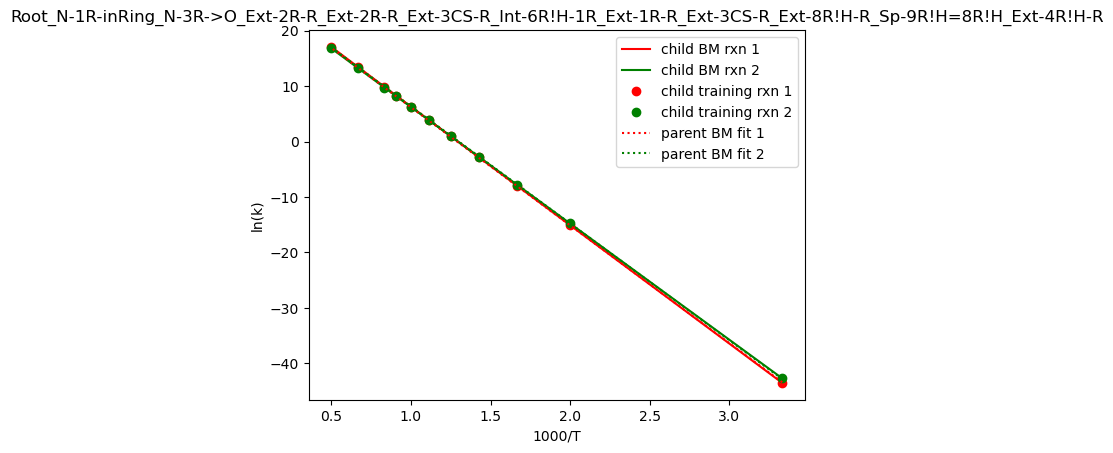

C11H15-25 <=> C11H15-26
C11H13-17 <=> C11H13-18
1.15e+11 s^-1 1.15e+11 s^-1


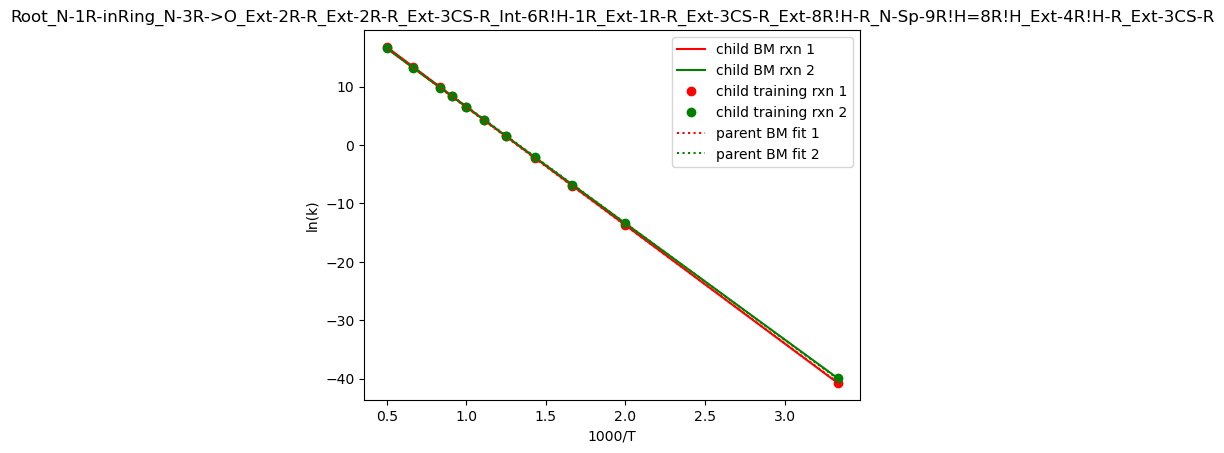

C10H17-25 <=> C10H17-26
C10H15-43 <=> C10H15-44
5.52e+10 s^-1 5.52e+10 s^-1


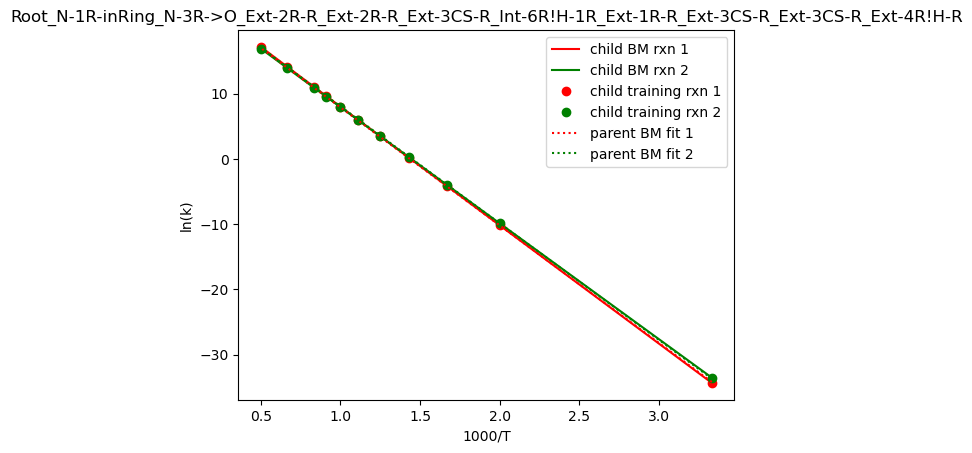

C9H15-35 <=> C9H15-36
C9H13-47 <=> C9H13-48
2.2e+11 s^-1 2.2e+11 s^-1


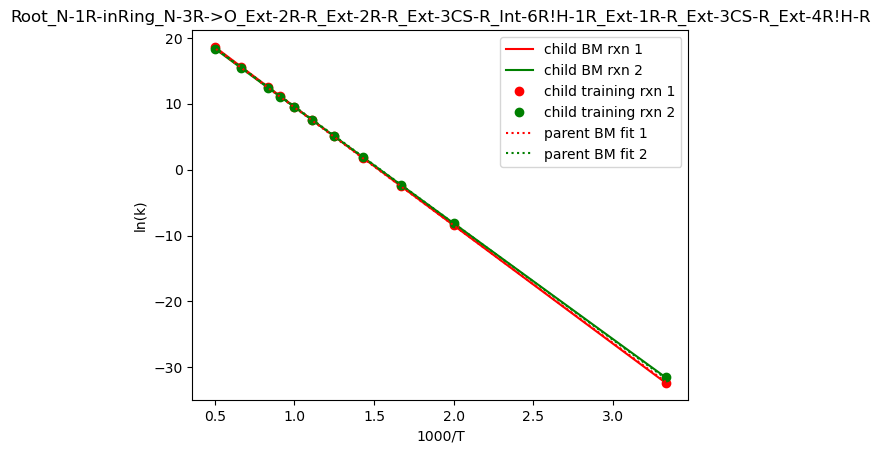

C8H13-33 <=> C8H13-34
C8H11-33 <=> C8H11-34
3.03e+10 s^-1 3.03e+10 s^-1


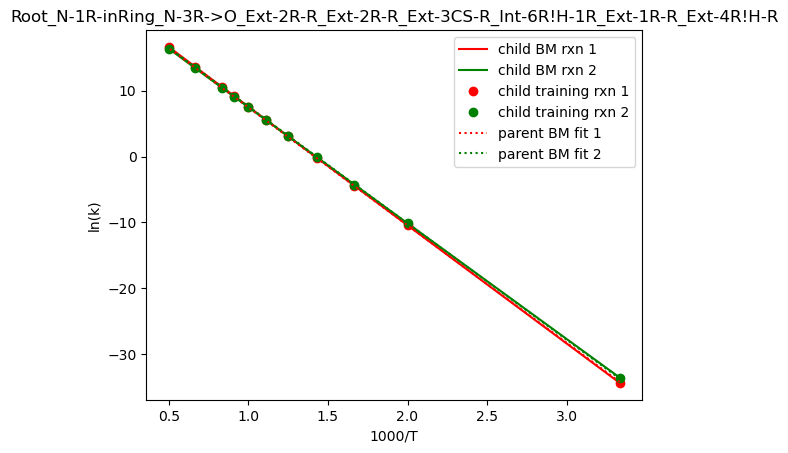

C10H15-11 <=> C10H15-12
C10H13-7 <=> C10H13-8
5.82e+10 s^-1 5.82e+10 s^-1


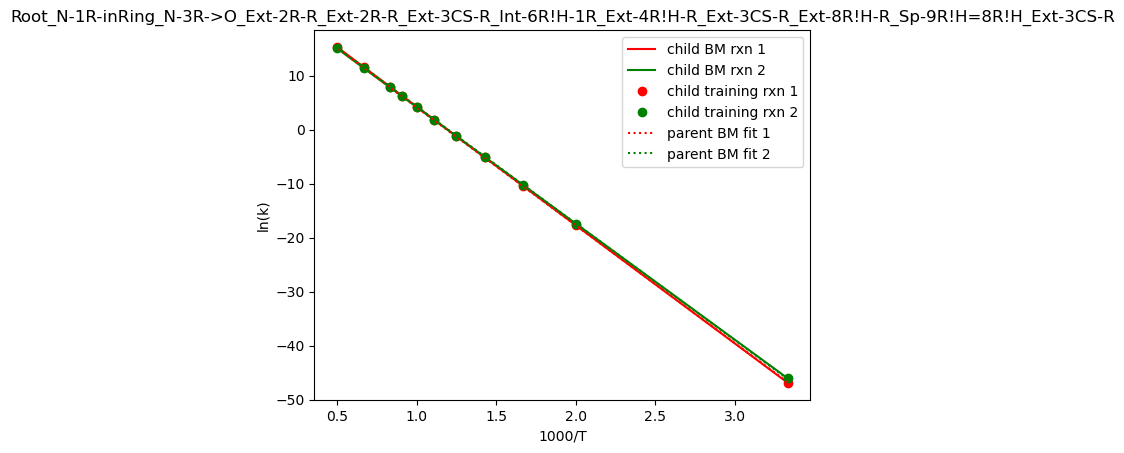

C10H13-5 <=> C10H13-6
C10H11-45 <=> C10H11-46
9.21e+10 s^-1 9.21e+10 s^-1


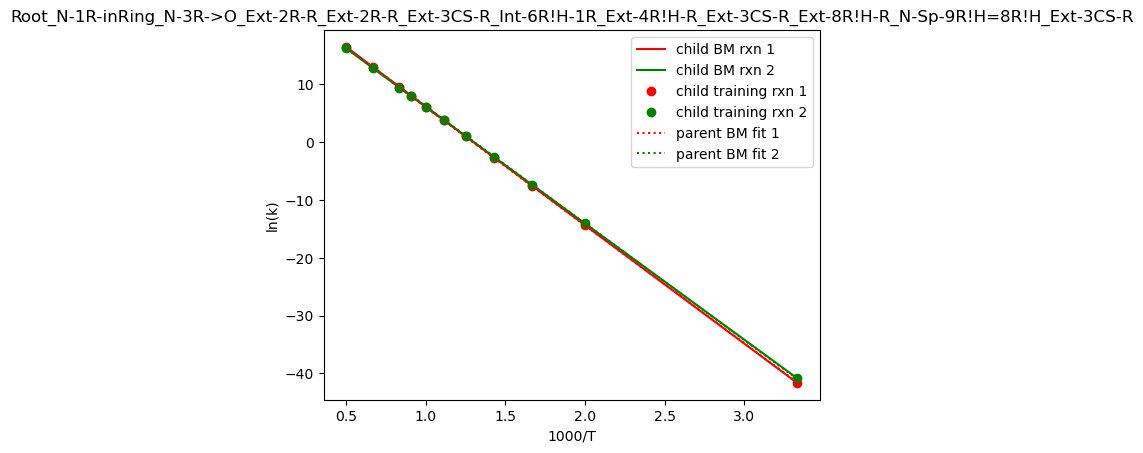

C9H15-11 <=> C9H15-12
C9H13-15 <=> C9H13-16
4.42e+10 s^-1 4.42e+10 s^-1


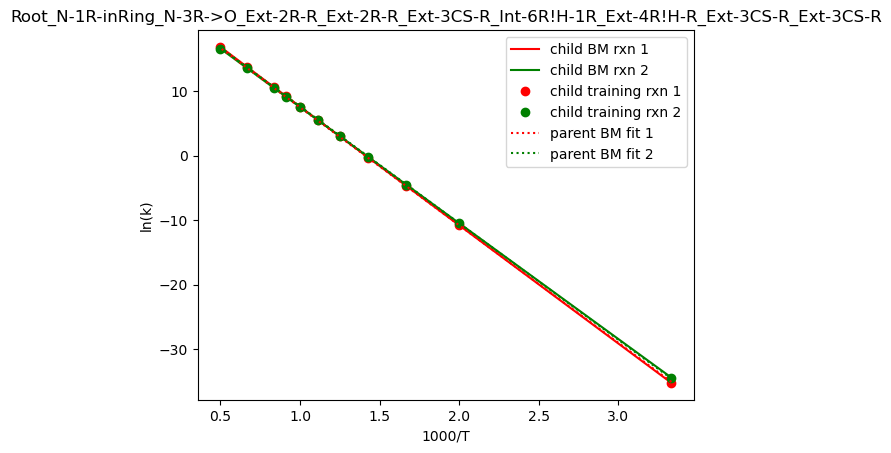

C11H15-3 <=> C11H15-4
C11H13-9 <=> C11H13-10
1.71e+09 s^-1 1.71e+09 s^-1


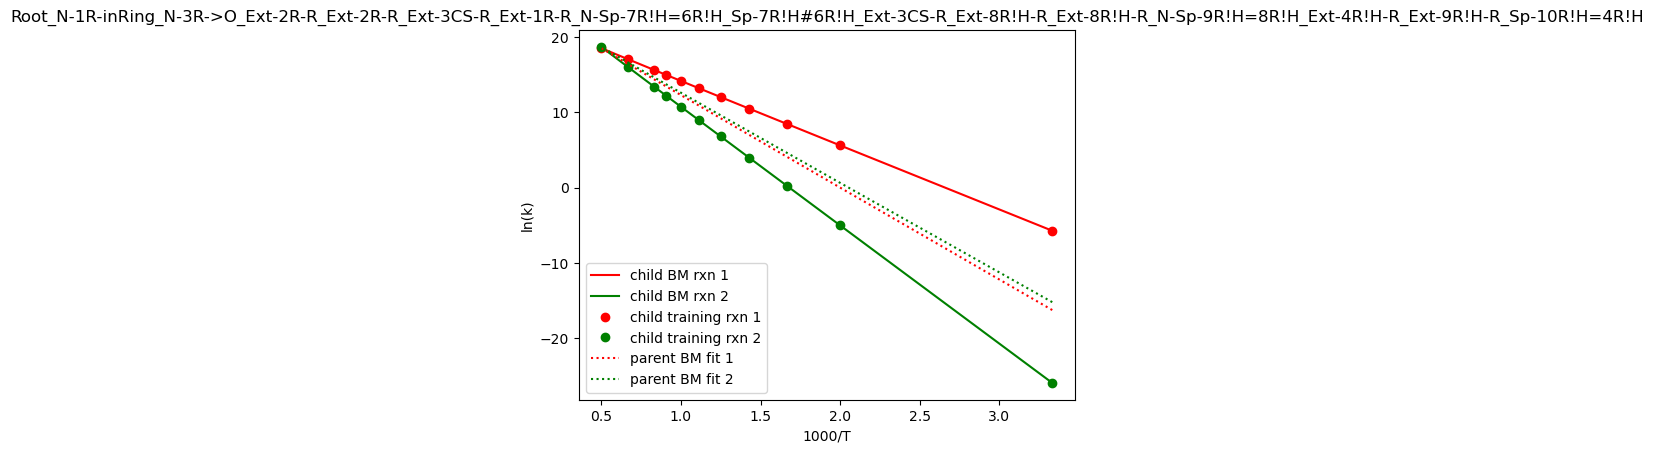

C11H13-3 <=> C11H13-4
C11H11-3 <=> C11H11-4
1.09e+09 s^-1 1.09e+09 s^-1


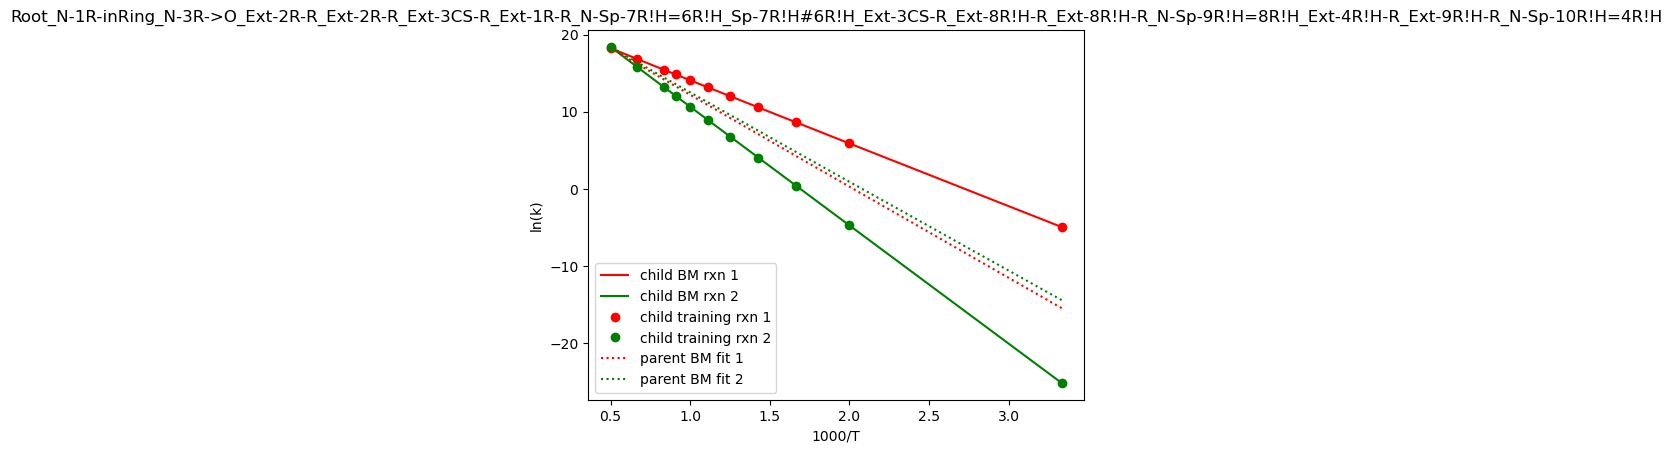

C11H17-49 <=> C11H17-50
C11H15-53 <=> C11H15-54
5.31e+08 s^-1 5.31e+08 s^-1


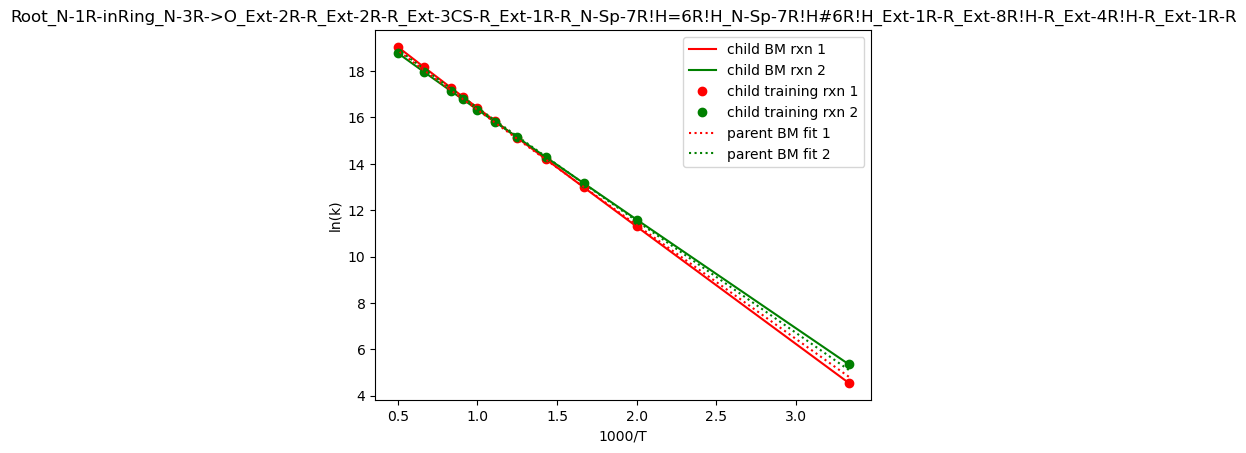

C10H17-21 <=> C10H17-22
C10H15-35 <=> C10H15-36
5.08e+08 s^-1 5.08e+08 s^-1


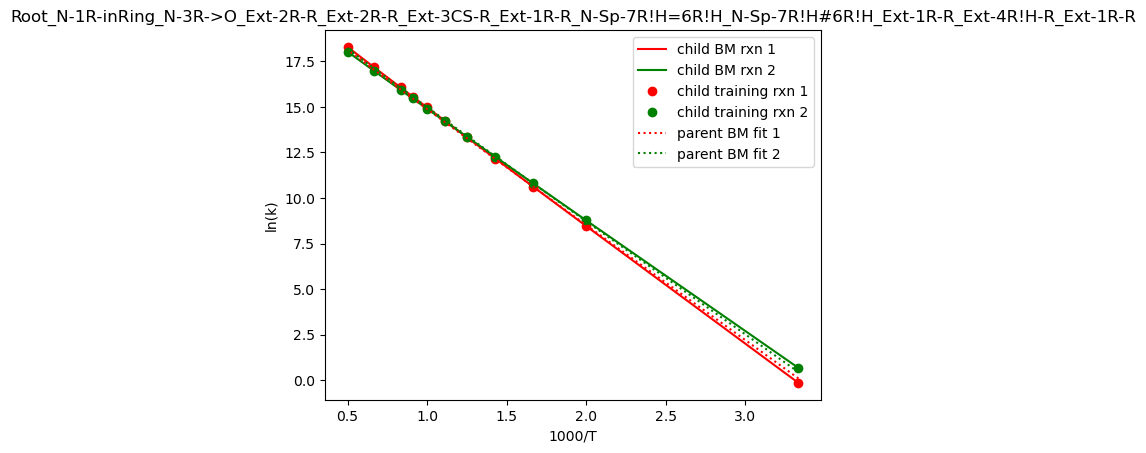

C9H15-43 <=> C9H15-44
C9H13-55 <=> C9H13-56
8.06e+09 s^-1 8.06e+09 s^-1


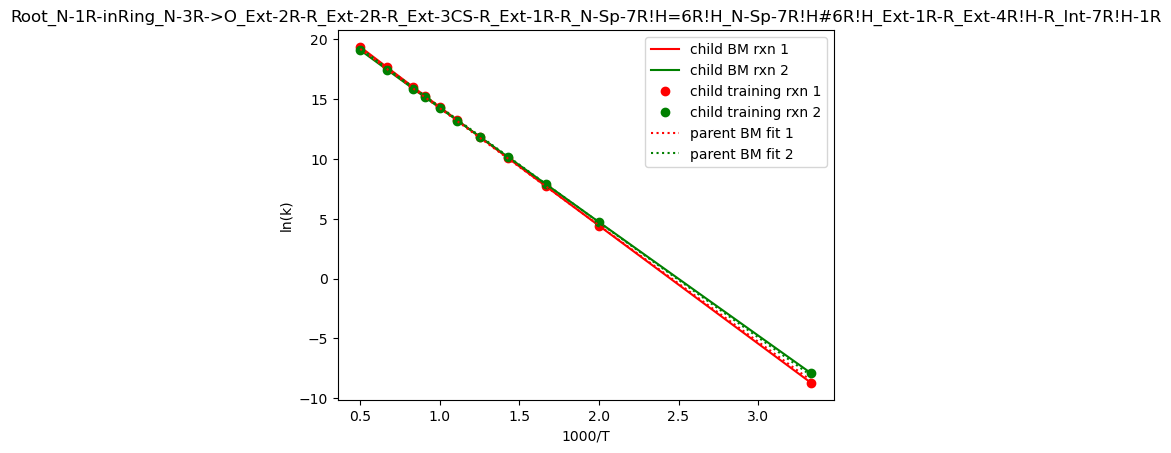

C8H13-19 <=> C8H13-20
C8H11-21 <=> C8H11-22
6.45e+09 s^-1 6.45e+09 s^-1


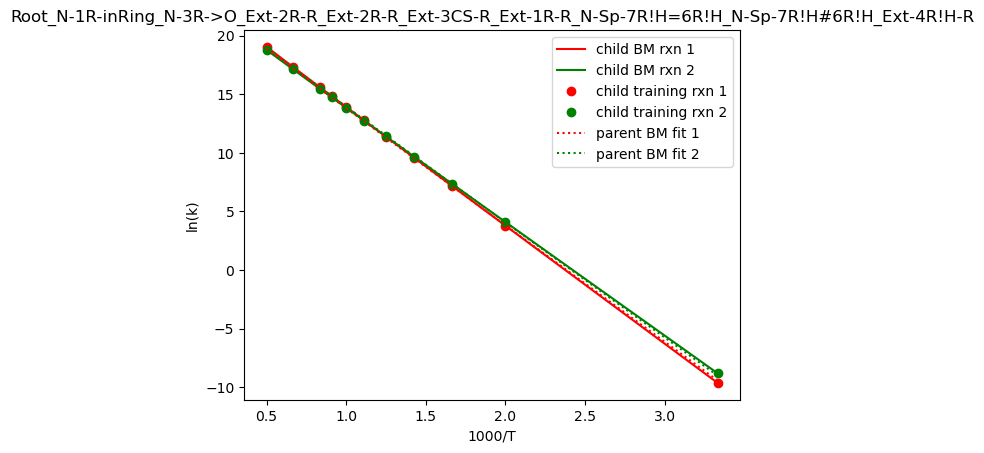

C14H19-5 <=> C14H19-6
C14H17-5 <=> C14H17-6
5.44e+10 s^-1 5.44e+10 s^-1


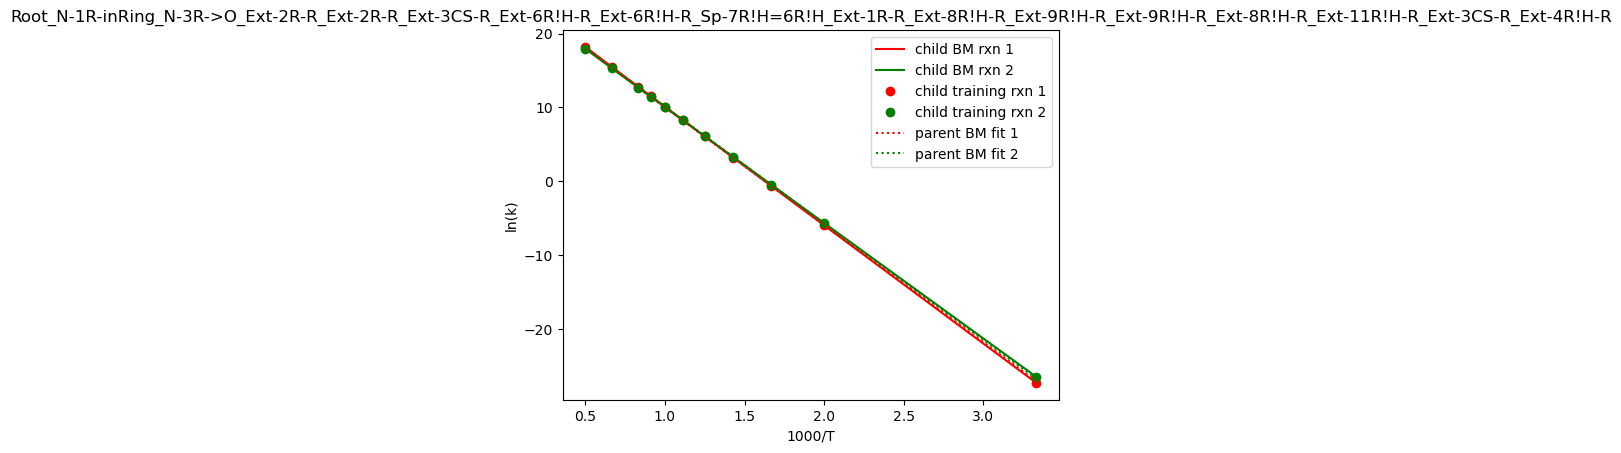

C13H17-23 <=> C13H17-24
C13H15-15 <=> C13H15-16
1.92e+11 s^-1 1.92e+11 s^-1


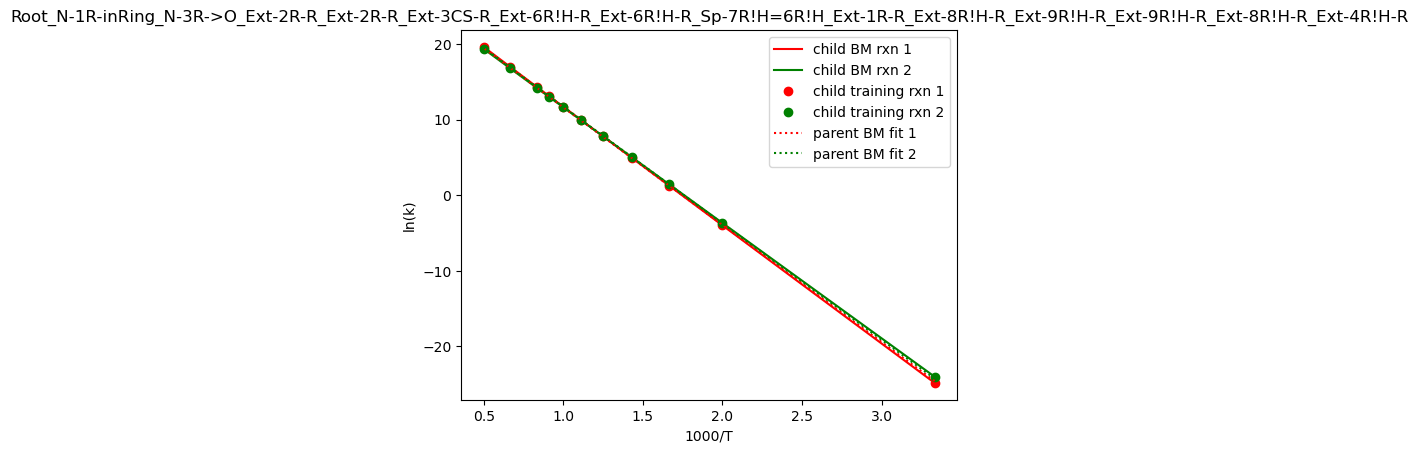

C13H19-19 <=> C13H19-20
C13H17-25 <=> C13H17-26
4.13e+10 s^-1 4.13e+10 s^-1


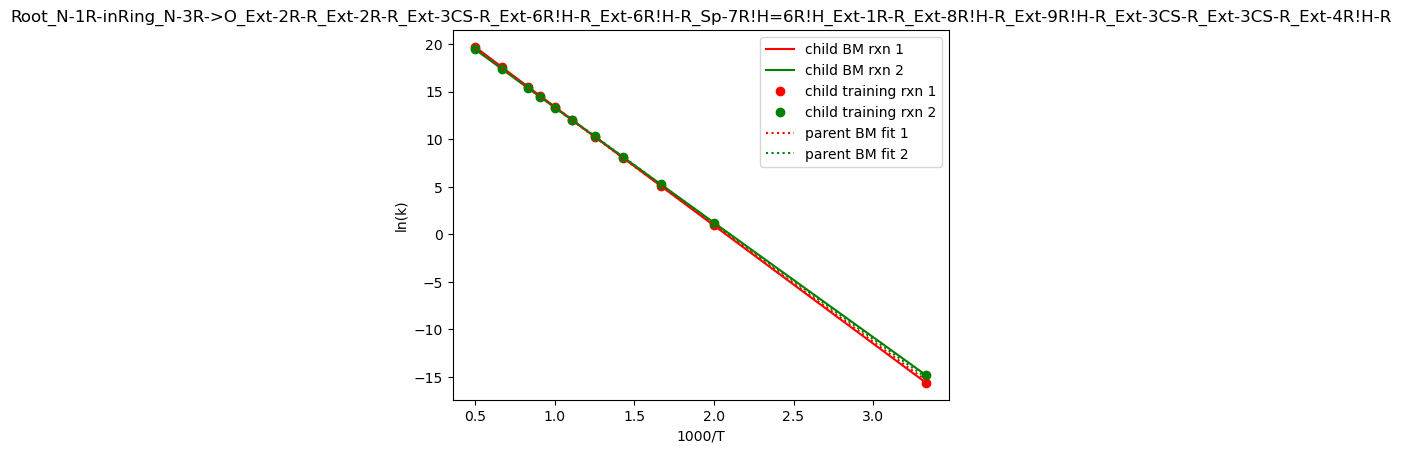

C12H17-53 <=> C12H17-54
C12H15-45 <=> C12H15-46
1.64e+11 s^-1 1.64e+11 s^-1


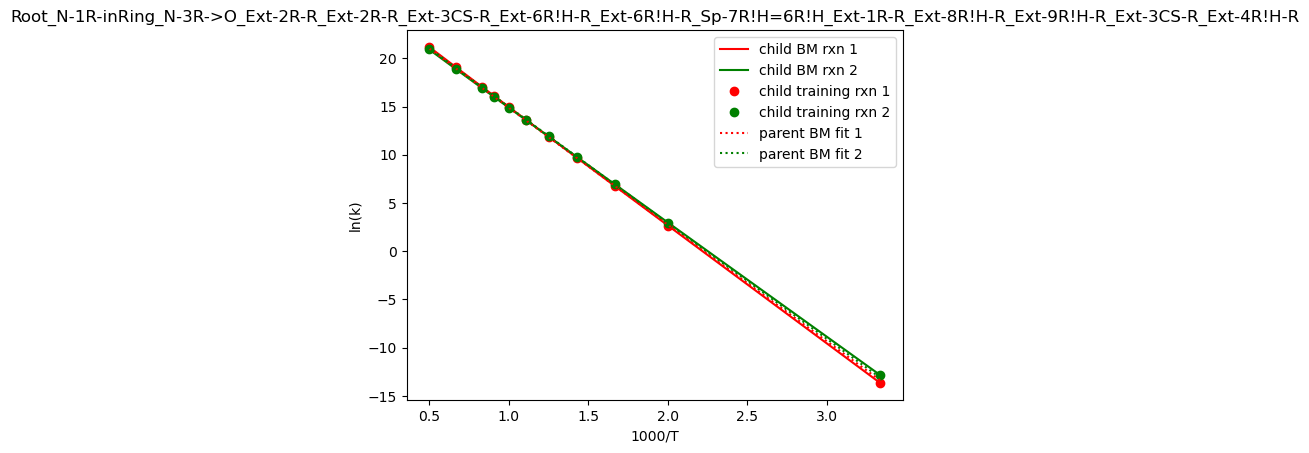

C11H15-79 <=> C11H15-80
C11H13-45 <=> C11H13-46
2.27e+10 s^-1 2.27e+10 s^-1


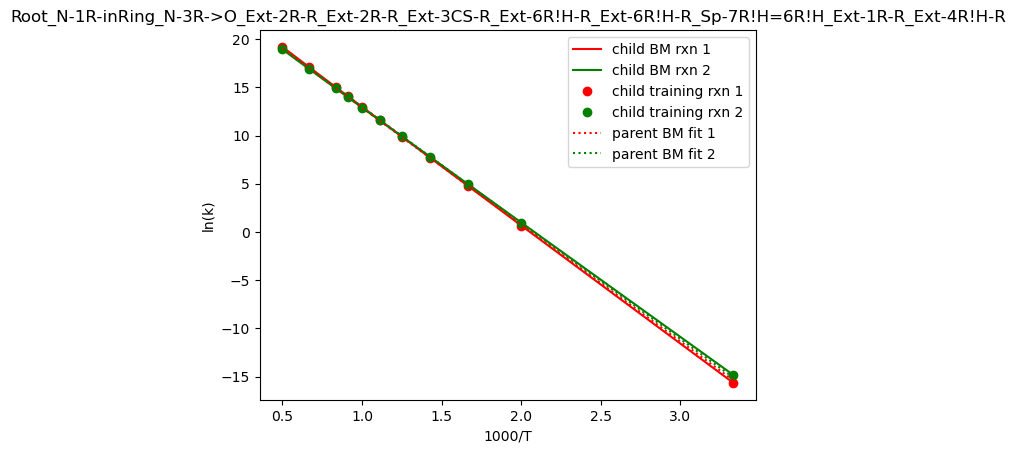

C13H19-5 <=> C13H19-6
C13H17-5 <=> C13H17-6
5.21e+10 s^-1 5.21e+10 s^-1


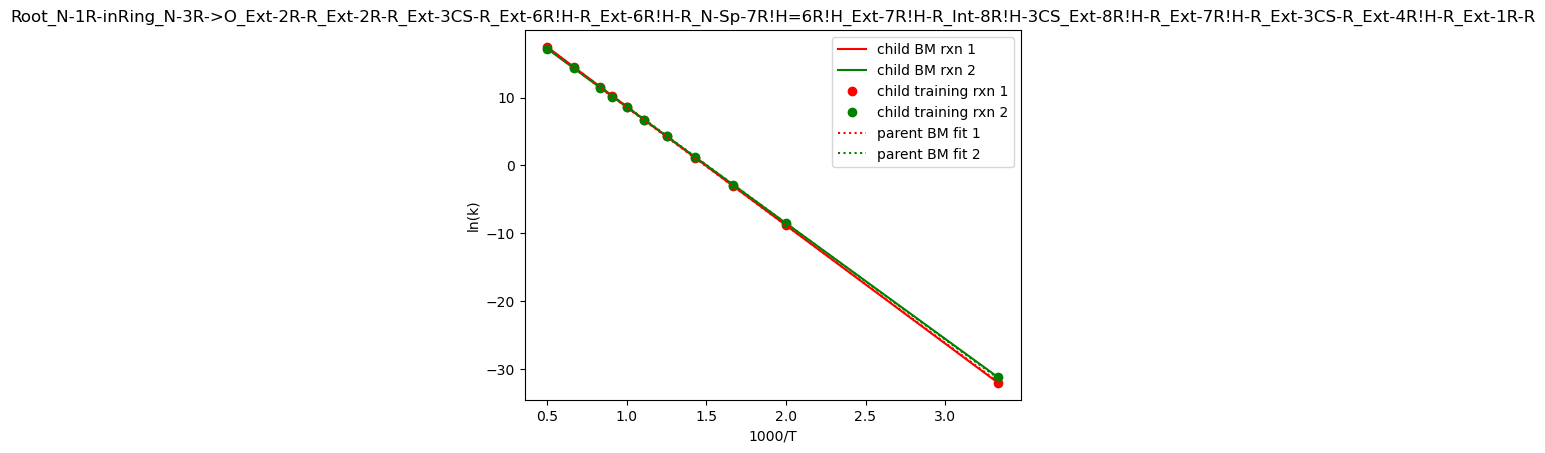

C12H17-23 <=> C12H17-24
C12H15-19 <=> C12H15-20
1.84e+11 s^-1 1.84e+11 s^-1


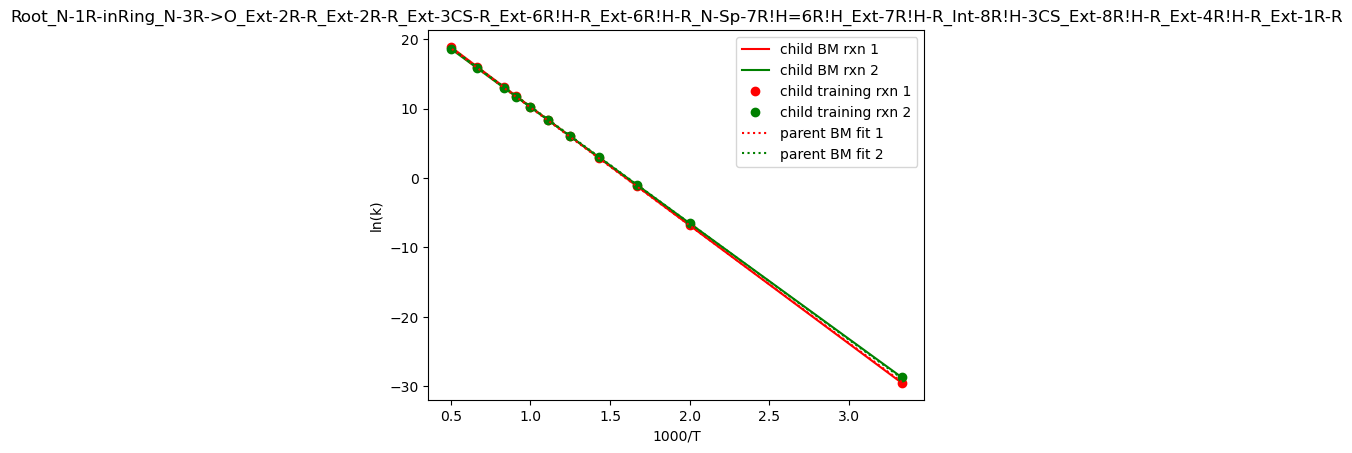

C12H19-15 <=> C12H19-16
C12H17-25 <=> C12H17-26
3.95e+10 s^-1 3.95e+10 s^-1


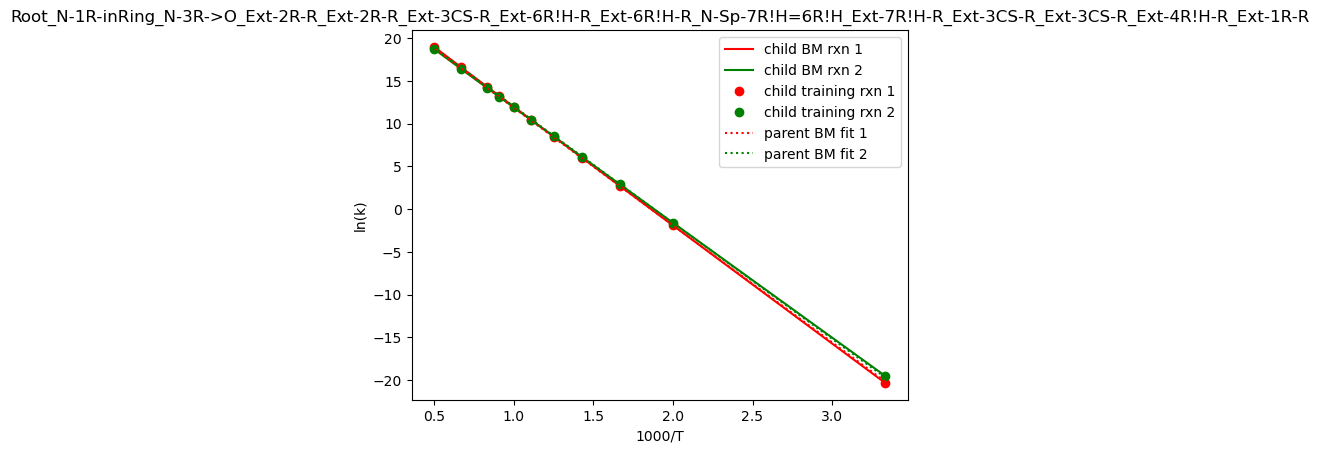

C11H17-41 <=> C11H17-42
C11H15-45 <=> C11H15-46
1.57e+11 s^-1 1.57e+11 s^-1


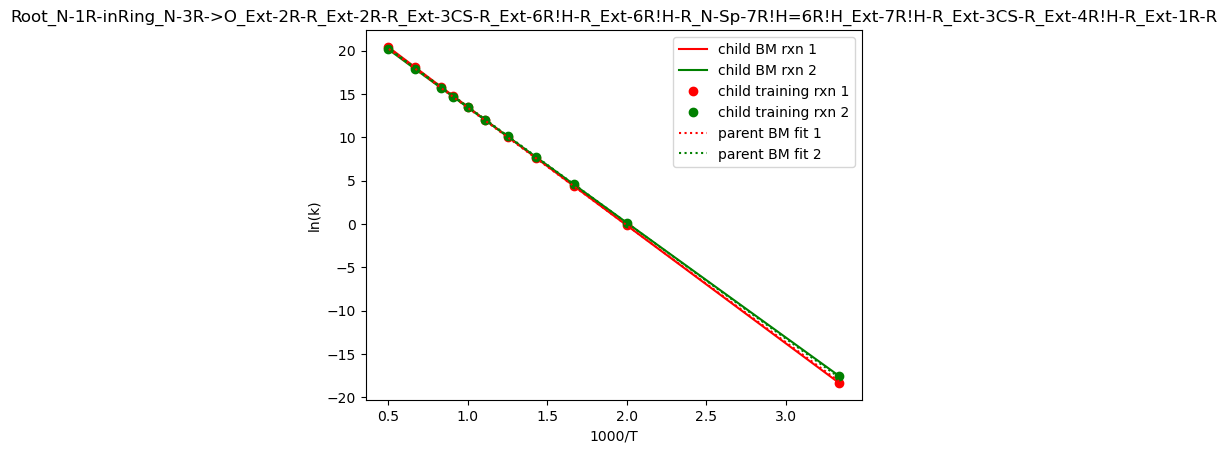

C10H15-61 <=> C10H15-62
C10H13-45 <=> C10H13-46
2.17e+10 s^-1 2.17e+10 s^-1


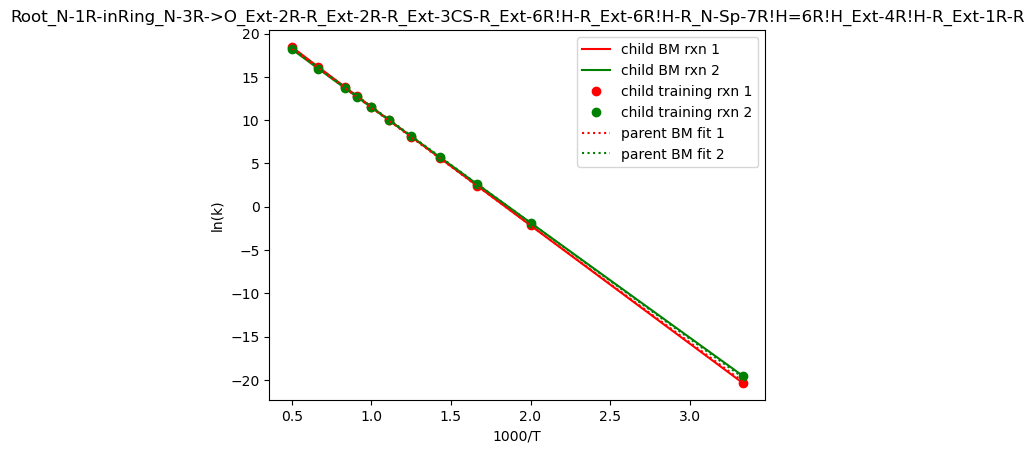

[CH2]C=CC=CC1C=CC=C1 <=> C10H11-15
[CH2]C=CC=CC1=CCC=C1 <=> C10H11-37
1.09944e+09 s^-1 1.09944e+09 s^-1


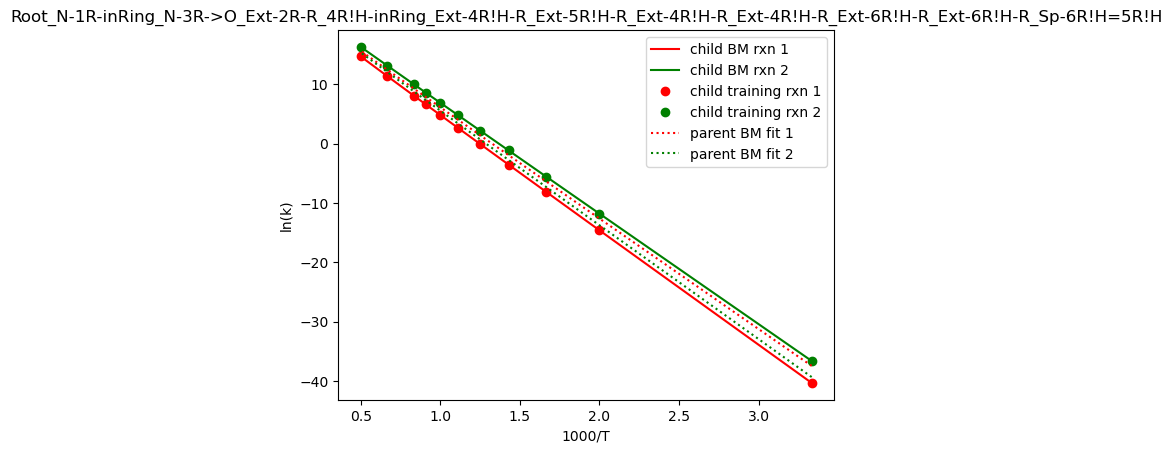

C11H15-57 <=> C11H15-58
C11H13-31 <=> C11H13-32
2.12e+11 s^-1 2.12e+11 s^-1


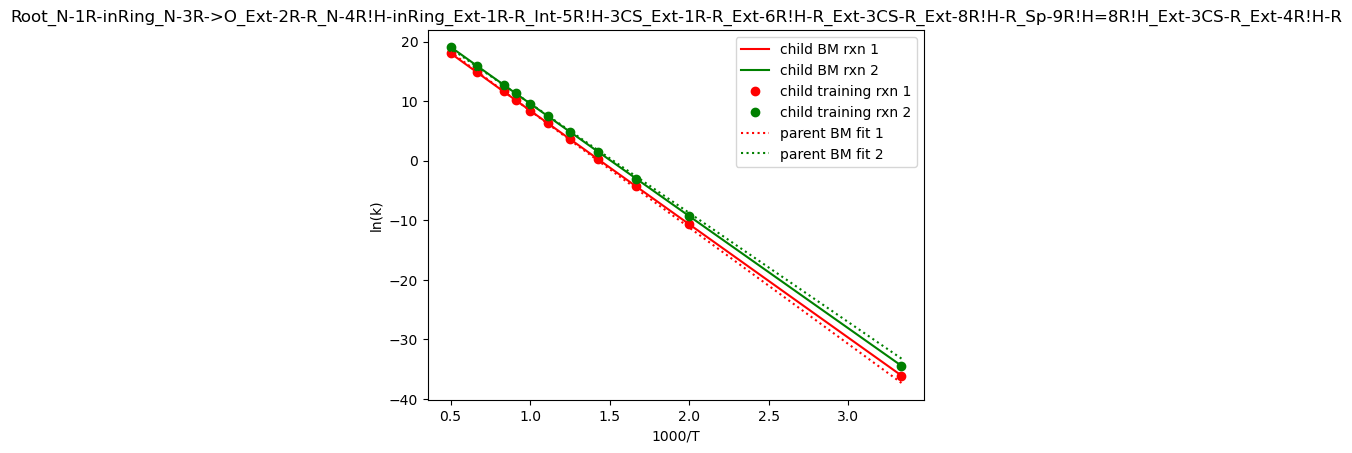

C10H13-55 <=> C10H13-56
C10H11-63 <=> C10H11-64
7.47e+11 s^-1 7.47e+11 s^-1


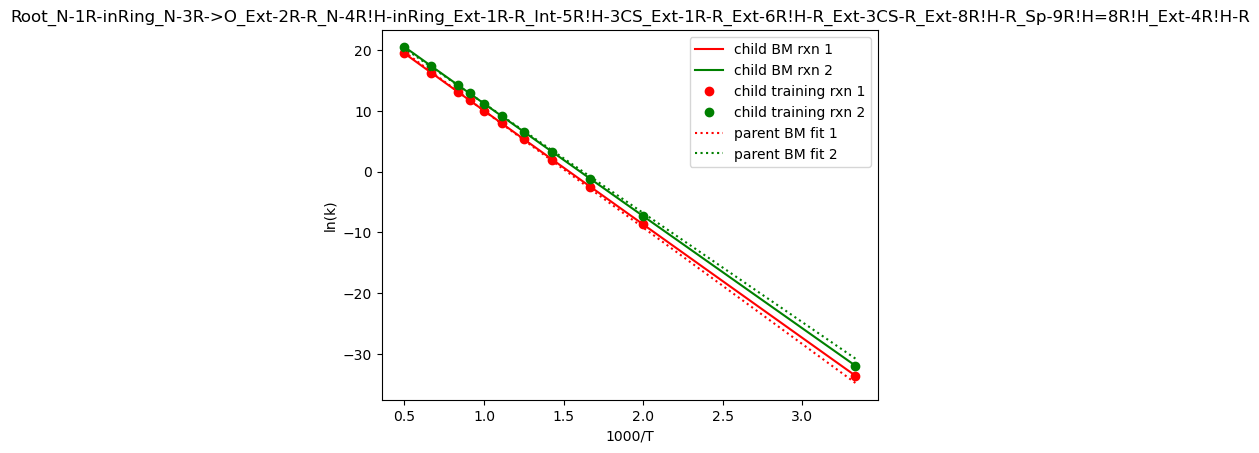

C11H13-27 <=> C11H13-28
C11H11-7 <=> C11H11-8
3.35e+11 s^-1 3.35e+11 s^-1


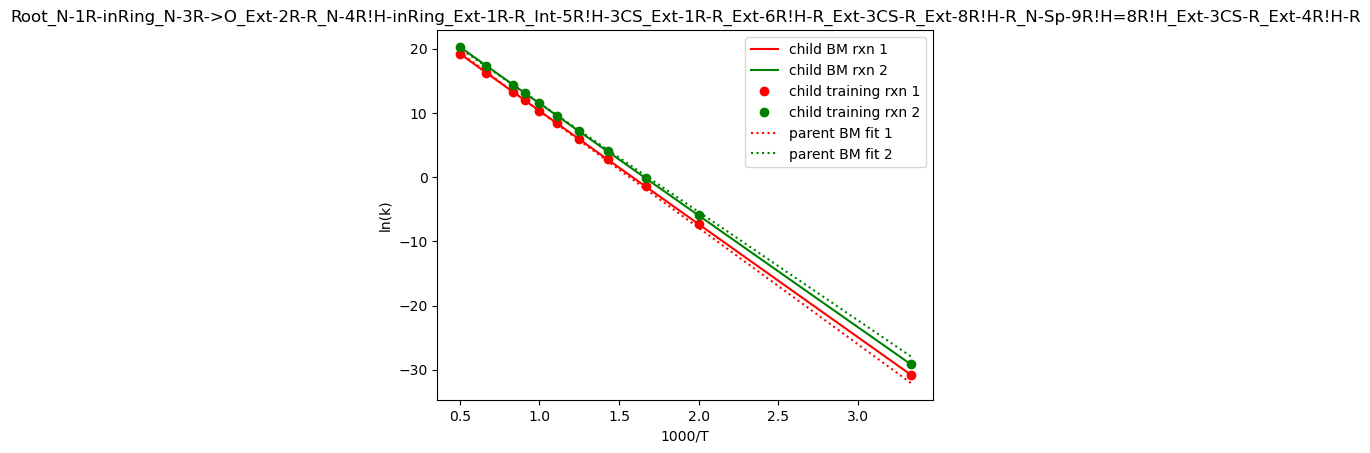

C10H11-61 <=> C10H11-62
C10H9-42 <=> C10H9-43
3.72e+11 s^-1 3.72e+11 s^-1


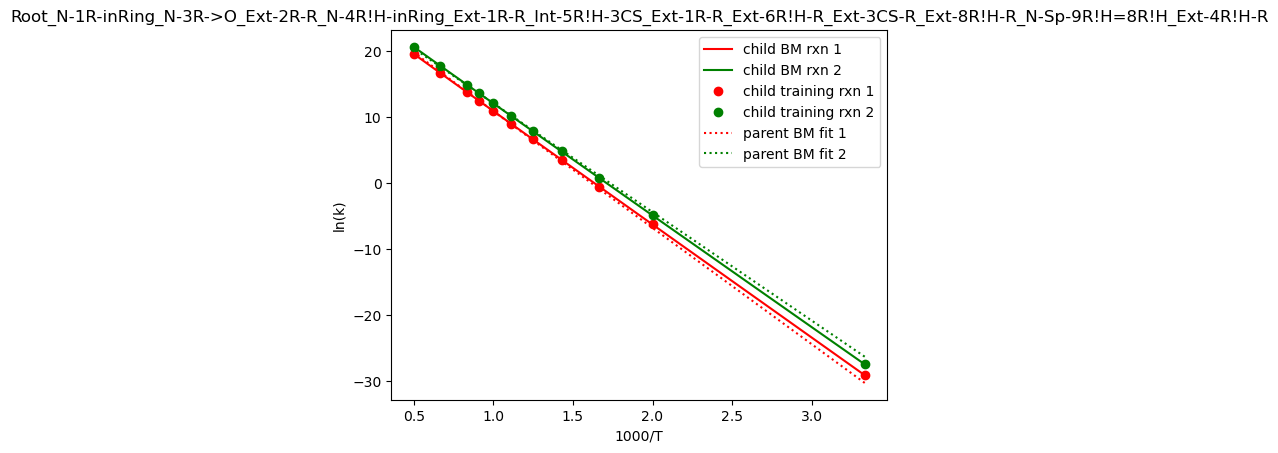

C10H15-71 <=> C10H15-72
C10H13-57 <=> C10H13-58
1.61e+11 s^-1 1.61e+11 s^-1


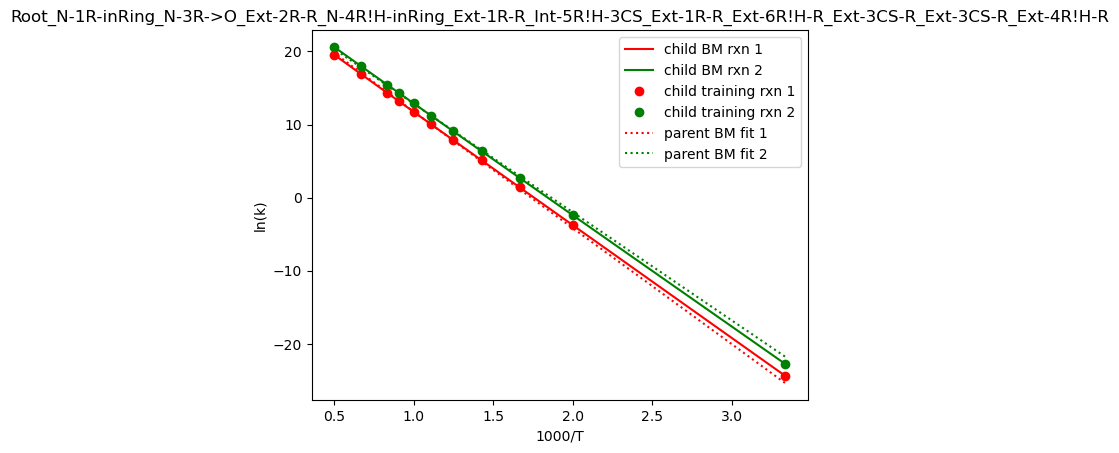

C9H13-65 <=> C9H13-66
C9H11-39 <=> C9H11-40
6.4e+11 s^-1 6.4e+11 s^-1


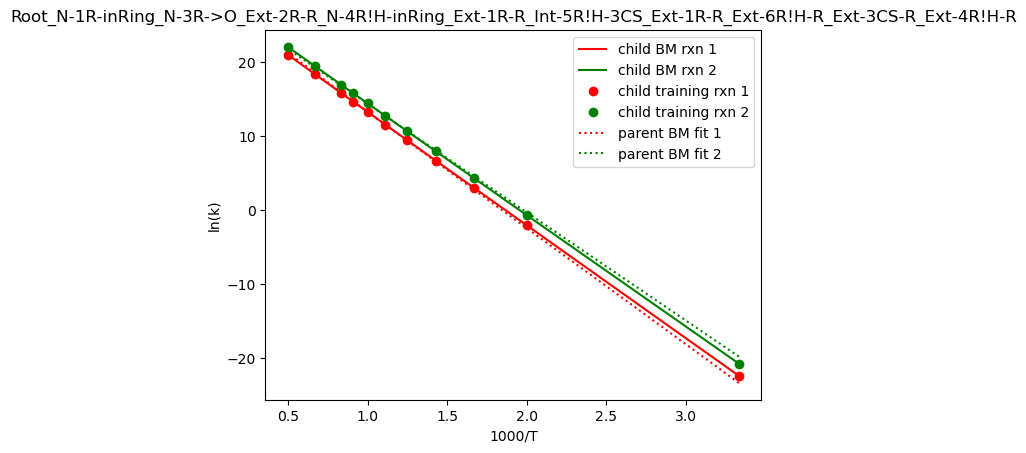

C8H11-41 <=> C8H11-42
C8H9-11 <=> C8H9-12
8.83e+10 s^-1 8.83e+10 s^-1


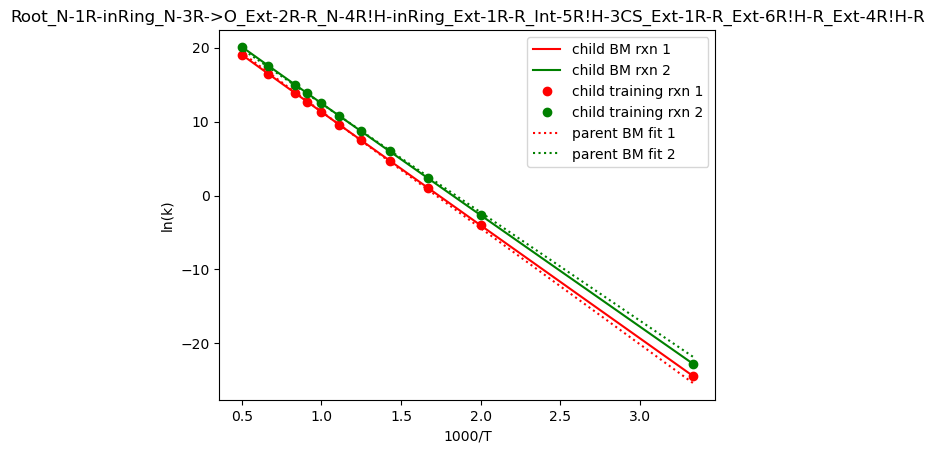

C10H15-39 <=> C10H15-40
C10H13-31 <=> C10H13-32
2.03e+11 s^-1 2.03e+11 s^-1


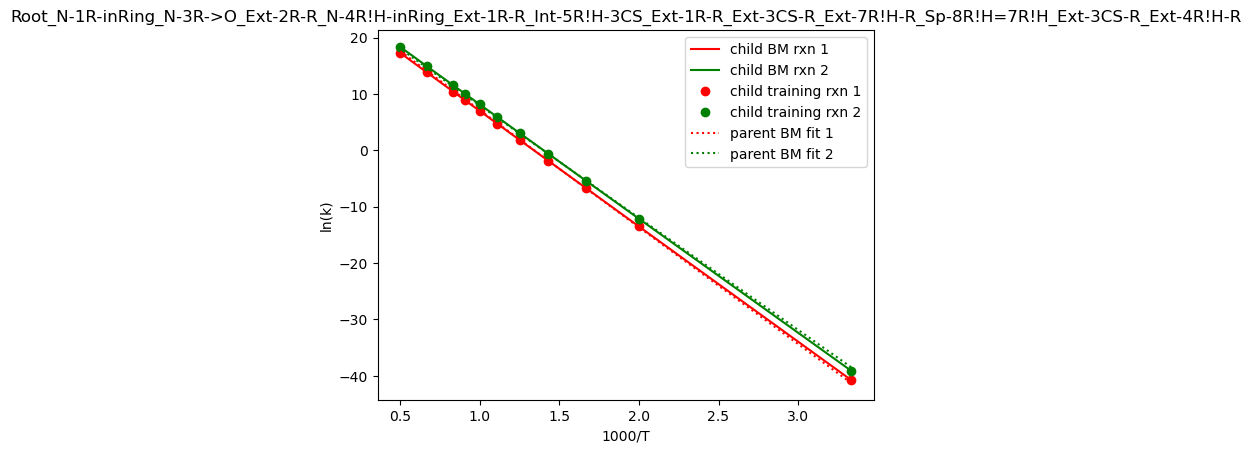

C9H13-43 <=> C9H13-44
C9H11-29 <=> C9H11-30
7.15e+11 s^-1 7.15e+11 s^-1


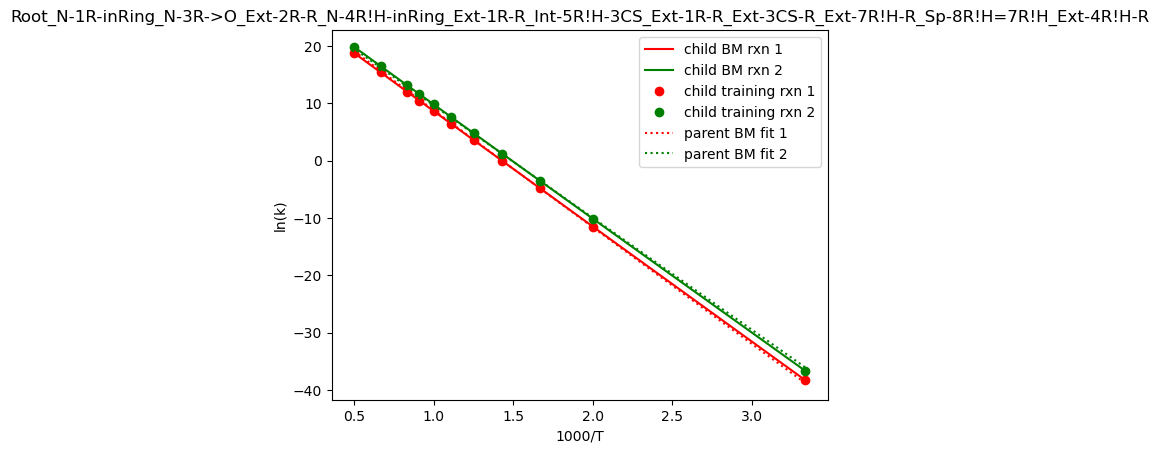

C10H13-27 <=> C10H13-28
C10H11-55 <=> C10H11-56
3.21e+11 s^-1 3.21e+11 s^-1


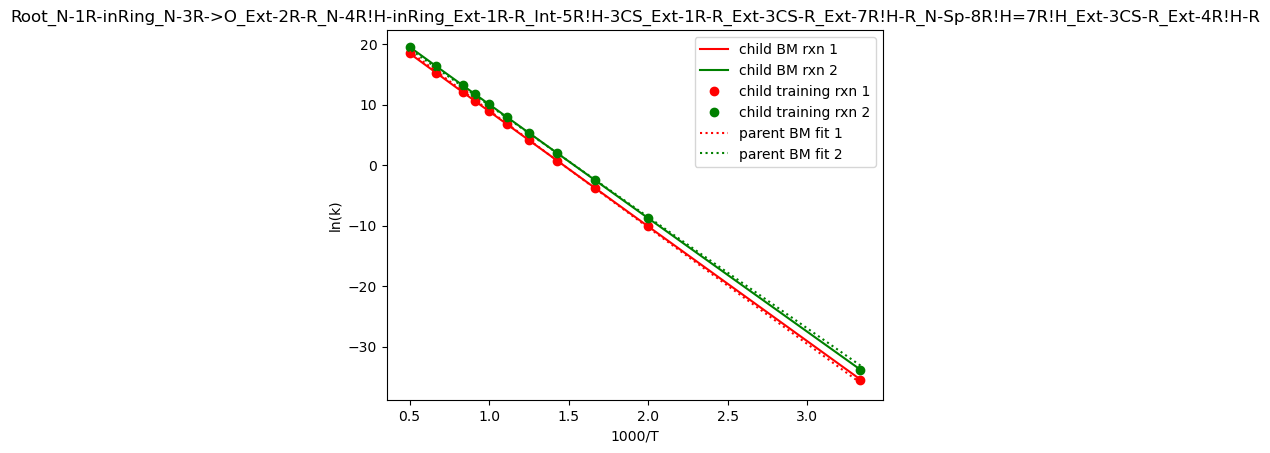

C9H11-27 <=> C9H11-28
C9H9-15 <=> C9H9-16
3.56e+11 s^-1 3.56e+11 s^-1


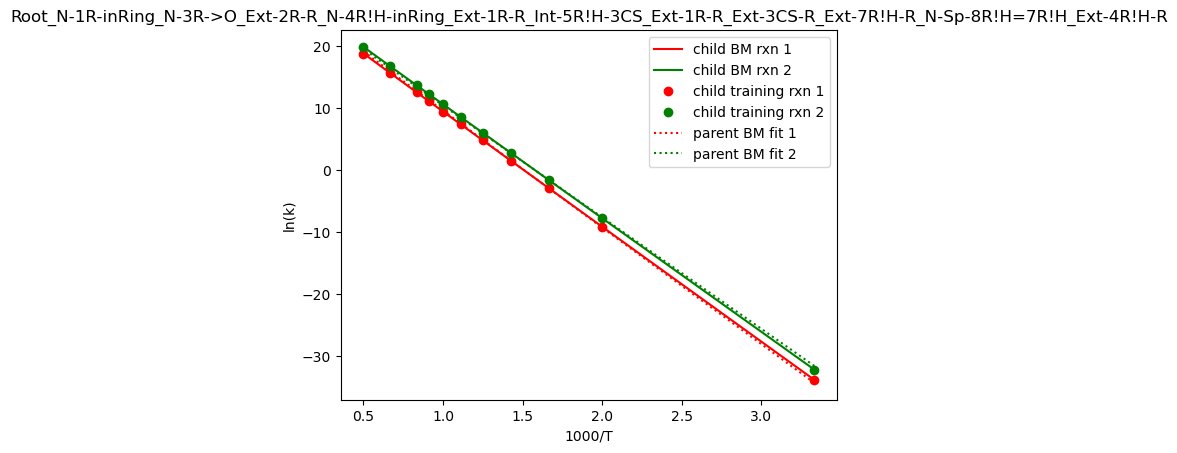

C9H15-33 <=> C9H15-34
C9H13-45 <=> C9H13-46
1.54e+11 s^-1 1.54e+11 s^-1


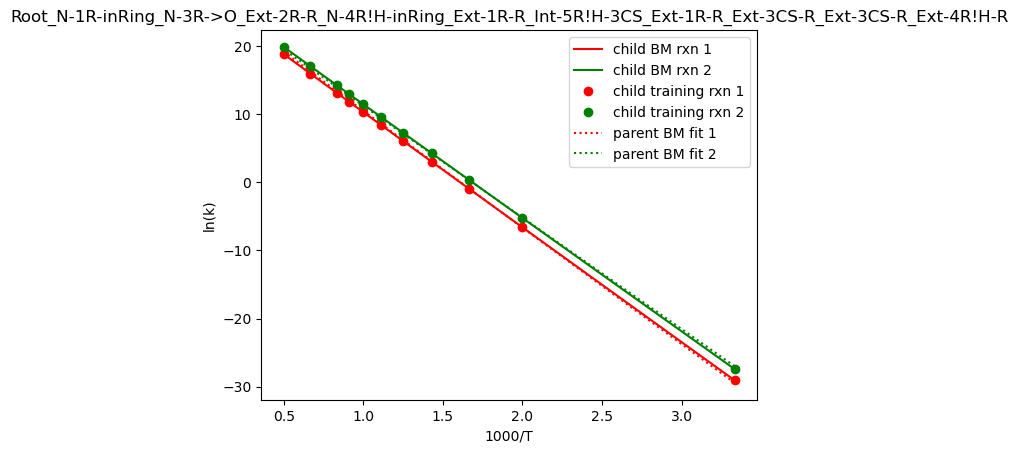

C8H13-31 <=> C8H13-32
C8H11-31 <=> C8H11-32
6.12e+11 s^-1 6.12e+11 s^-1


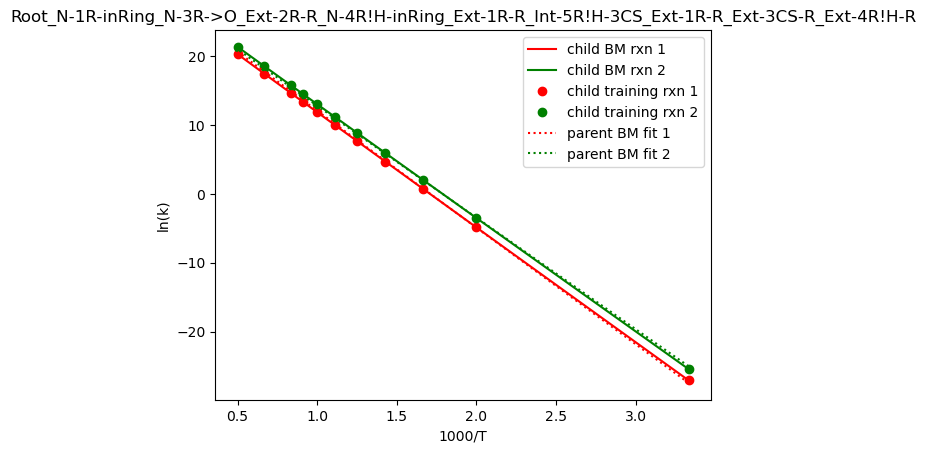

C7H11-25 <=> C7H11-26
C7H9-65 <=> C7H9-66
8.45e+10 s^-1 8.45e+10 s^-1


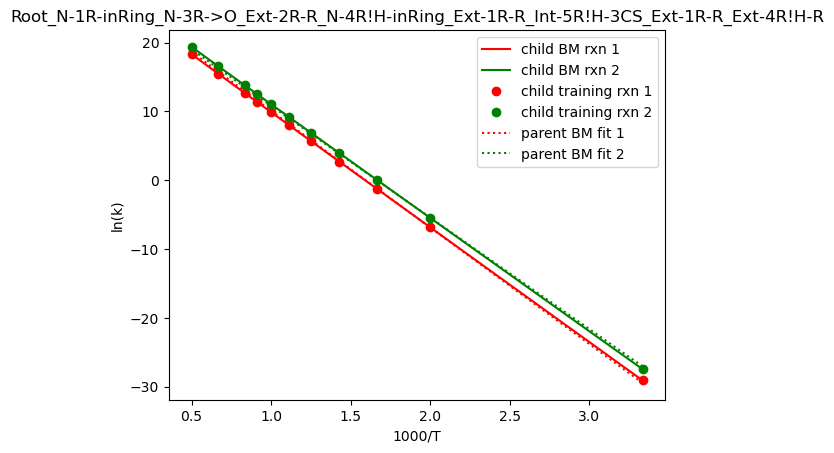

C9H13-11 <=> C9H13-12
C9H11-11 <=> C9H11-12
1.62e+11 s^-1 1.62e+11 s^-1


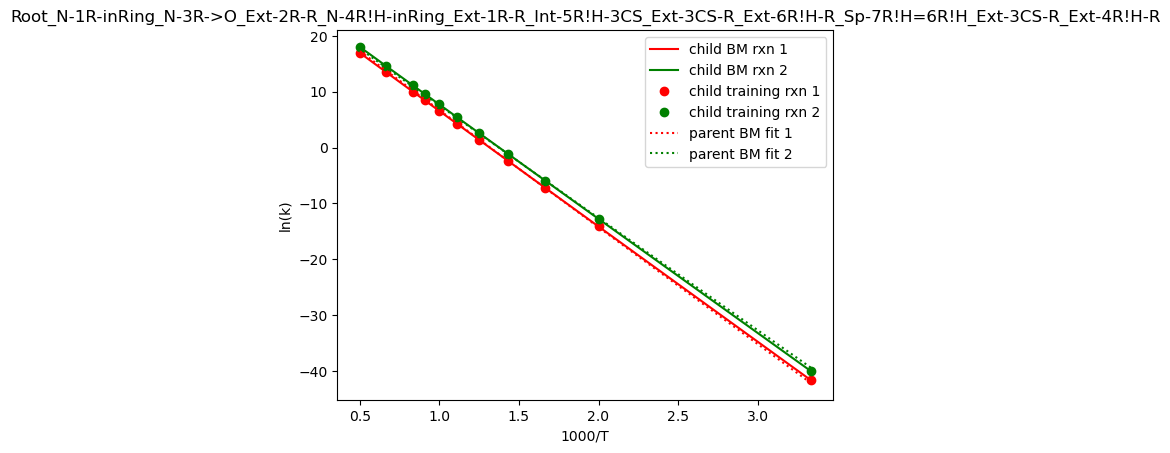

C8H11-9 <=> C8H11-10
C8H9-3 <=> C8H9-4
5.72e+11 s^-1 5.72e+11 s^-1


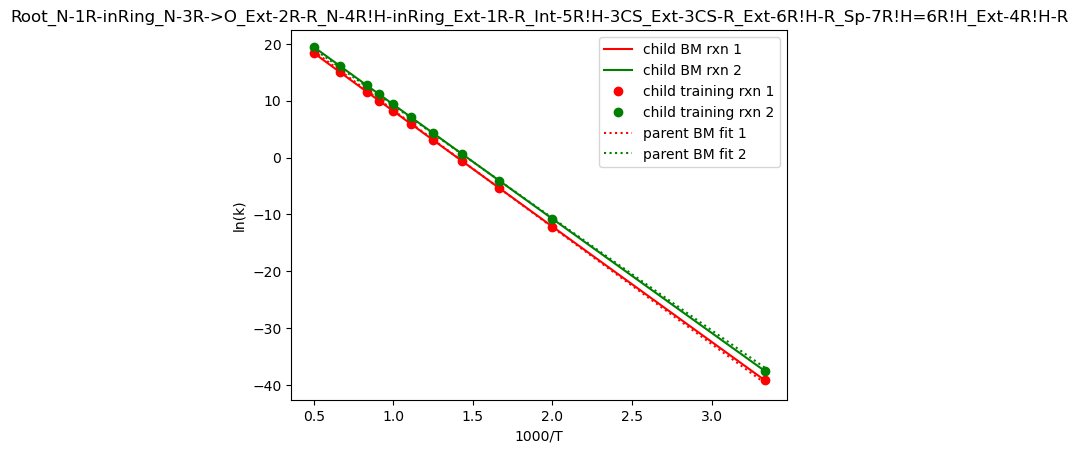

C9H11-7 <=> C9H11-8
C9H9-9 <=> C9H9-10
2.56e+11 s^-1 2.56e+11 s^-1


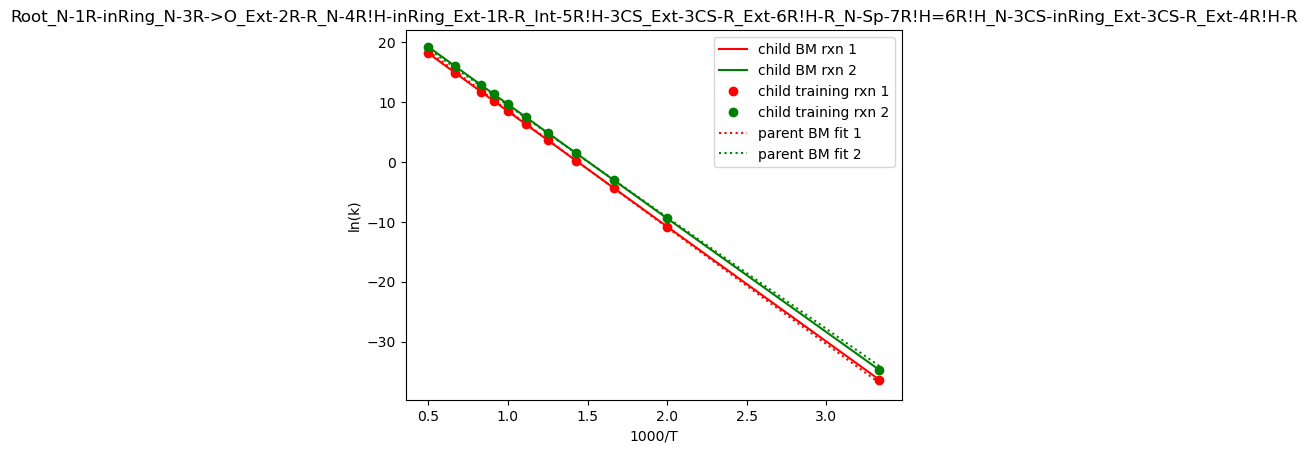

C8H9 <=> C8H9-2
C8H7 <=> C8H7-2
2.85e+11 s^-1 2.85e+11 s^-1


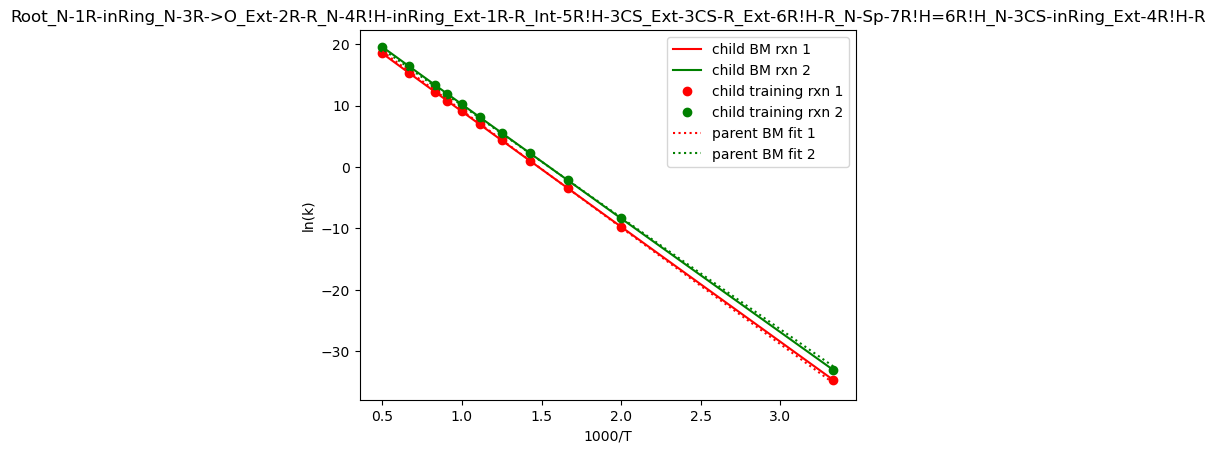

C8H13-9 <=> C8H13-10
C8H11-11 <=> C8H11-12
1.23e+11 s^-1 1.23e+11 s^-1


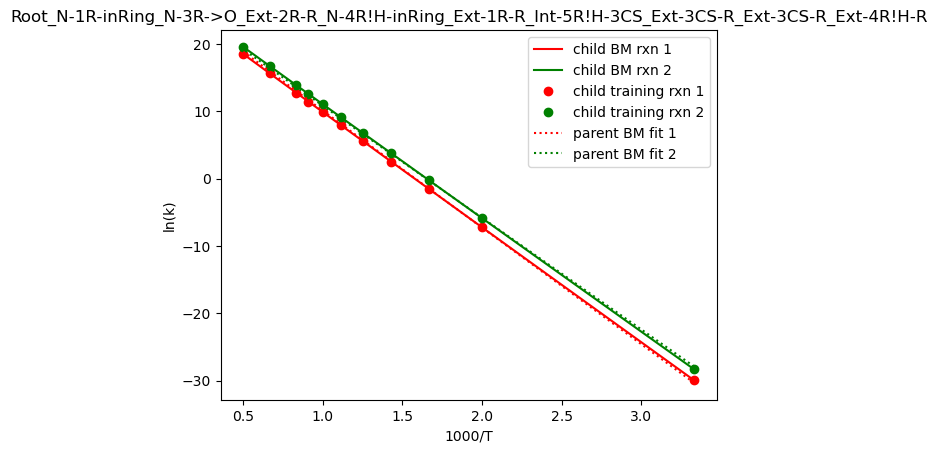

C7H11-11 <=> C7H11-12
C7H9-55 <=> C7H9-56
4.9e+11 s^-1 4.9e+11 s^-1


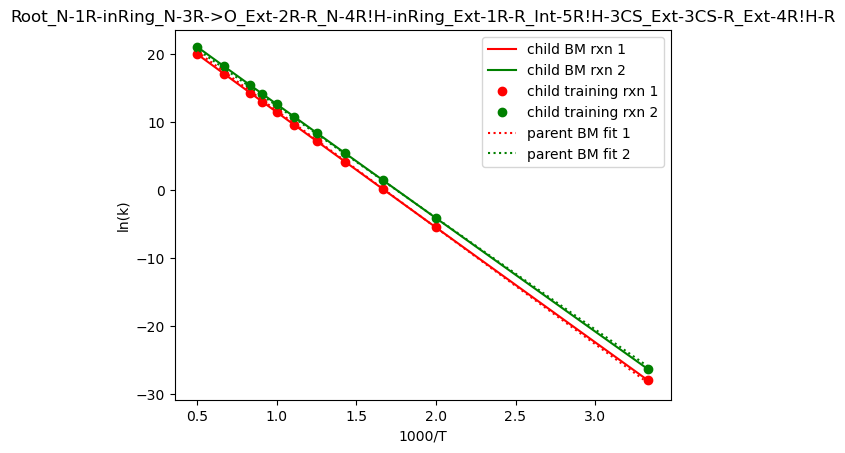

C6H9-13 <=> C6H9-14
C6H7-15 <=> C6H7-16
6.76e+10 s^-1 6.76e+10 s^-1


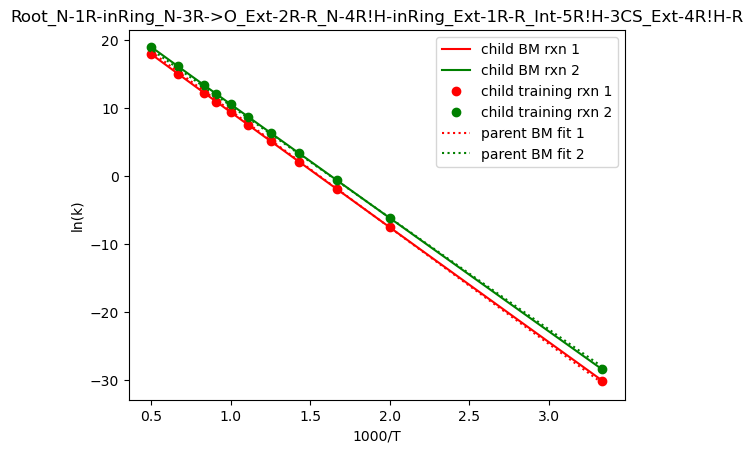

C13H15-9 <=> C13H15-10
C13H13 <=> C13H13-2
2.4e+11 s^-1 2.4e+11 s^-1


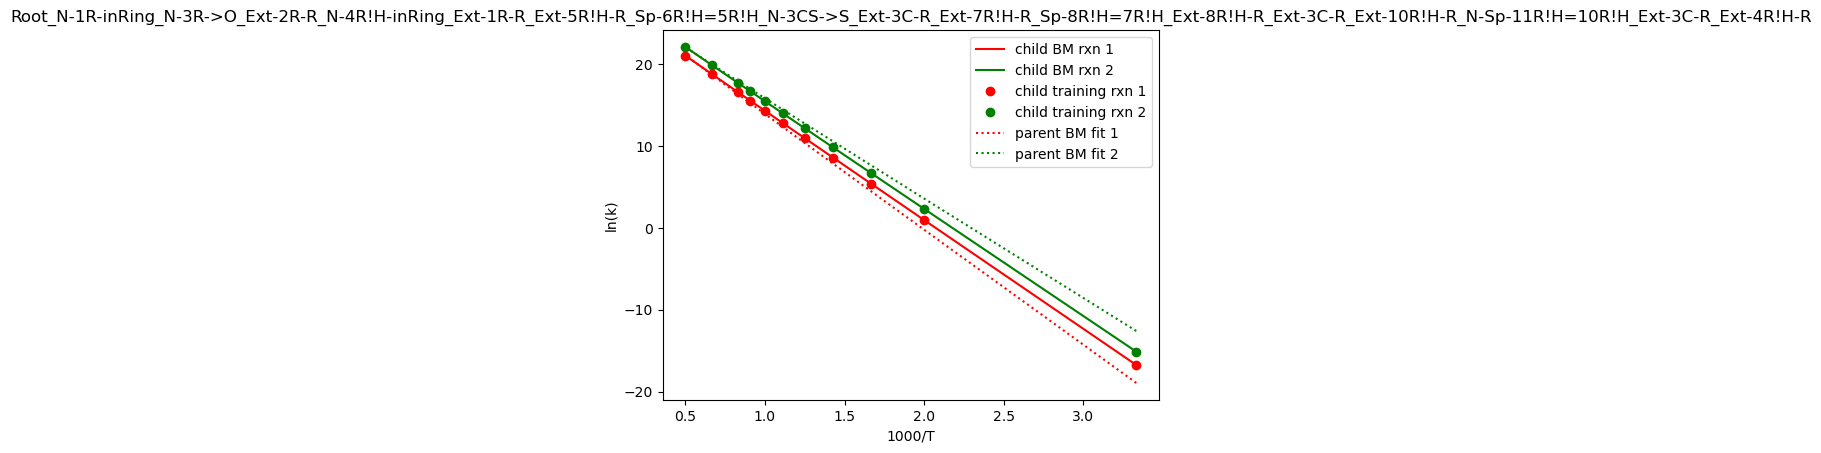

C12H13-15 <=> C12H13-16
C12H11 <=> C12H11-2
2.66e+11 s^-1 2.66e+11 s^-1


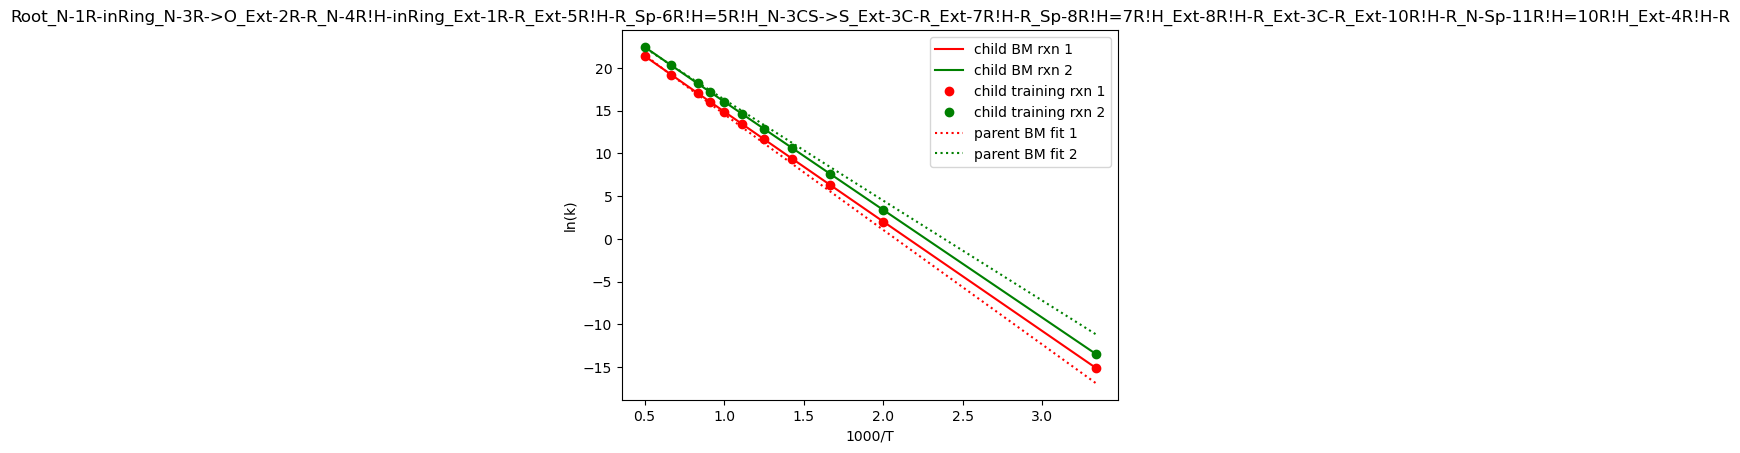

C12H17-51 <=> C12H17-52
C12H15-43 <=> C12H15-44
1.15e+11 s^-1 1.15e+11 s^-1


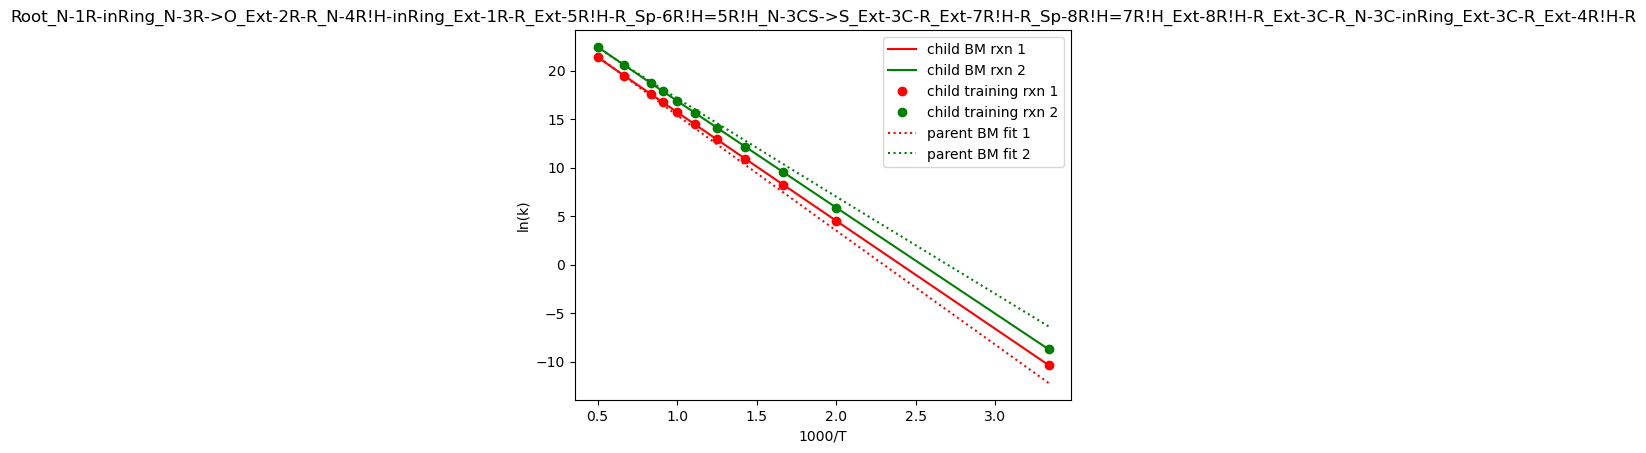

C11H15-77 <=> C11H15-78
C11H13-43 <=> C11H13-44
4.58e+11 s^-1 4.58e+11 s^-1


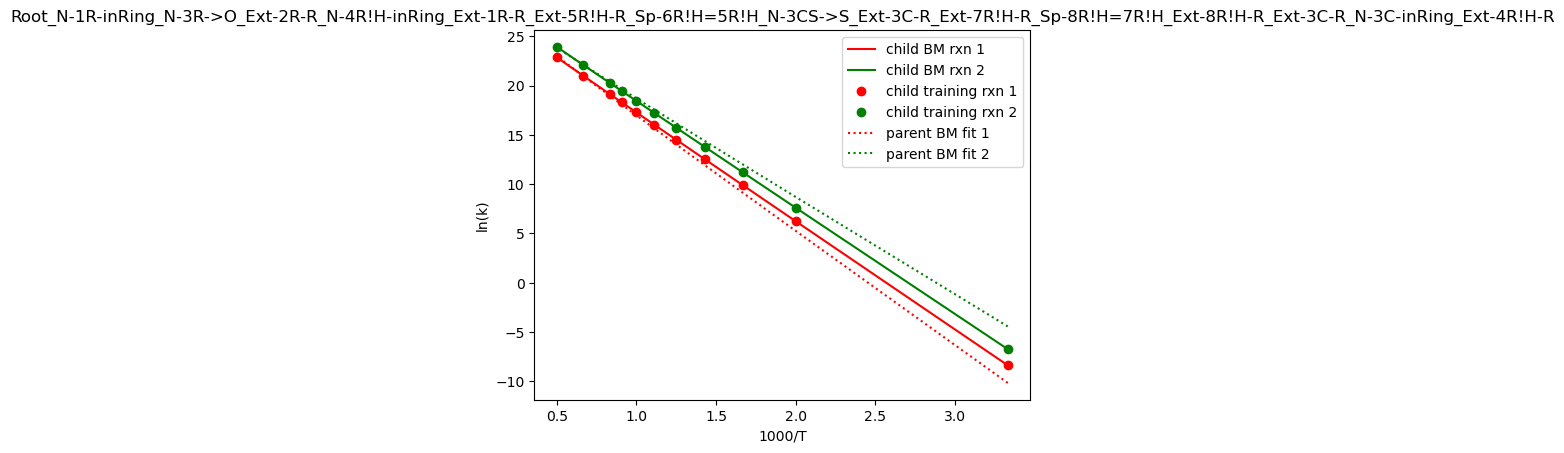

C10H13-71 <=> C10H13-72
C10H11-67 <=> C10H11-68
6.32e+10 s^-1 6.32e+10 s^-1


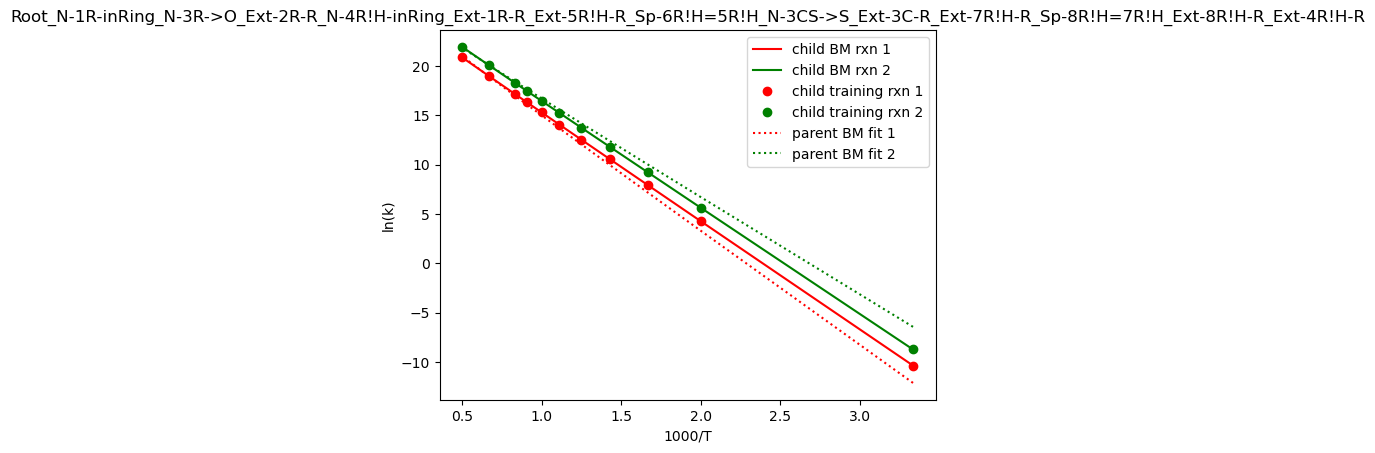

C11H15-67 <=> C11H15-68
C11H13-37 <=> C11H13-38
1.99e+11 s^-1 1.99e+11 s^-1


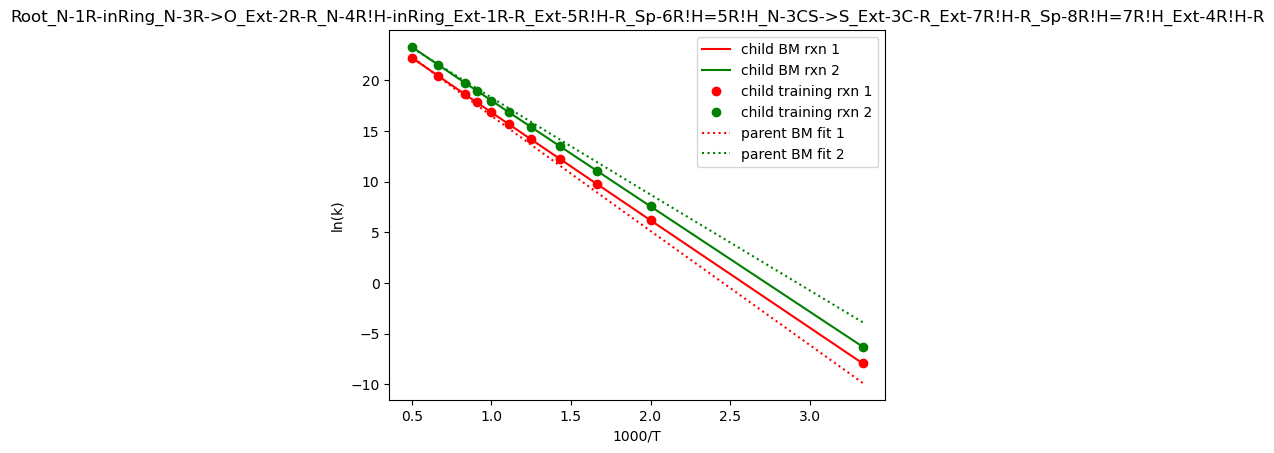

C12H15-29 <=> C12H15-30
C12H13-11 <=> C12H13-12
8.9e+10 s^-1 8.9e+10 s^-1


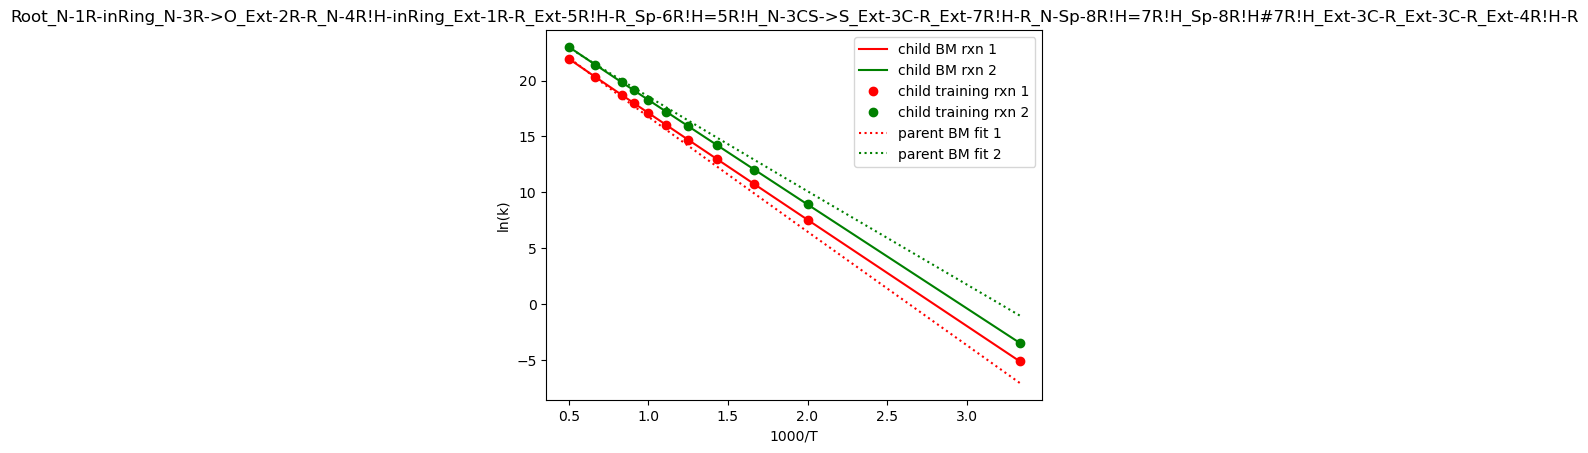

C11H13-35 <=> C11H13-36
C11H11-11 <=> C11H11-12
9.89e+10 s^-1 9.89e+10 s^-1


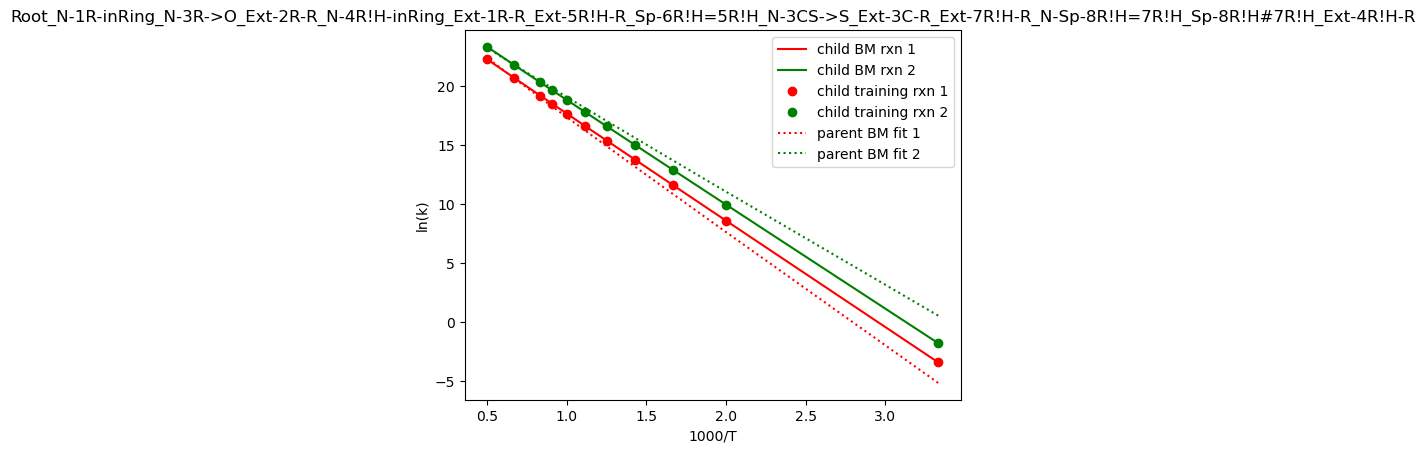

C11H17-47 <=> C11H17-48
C11H15-51 <=> C11H15-52
1.07e+10 s^-1 1.07e+10 s^-1


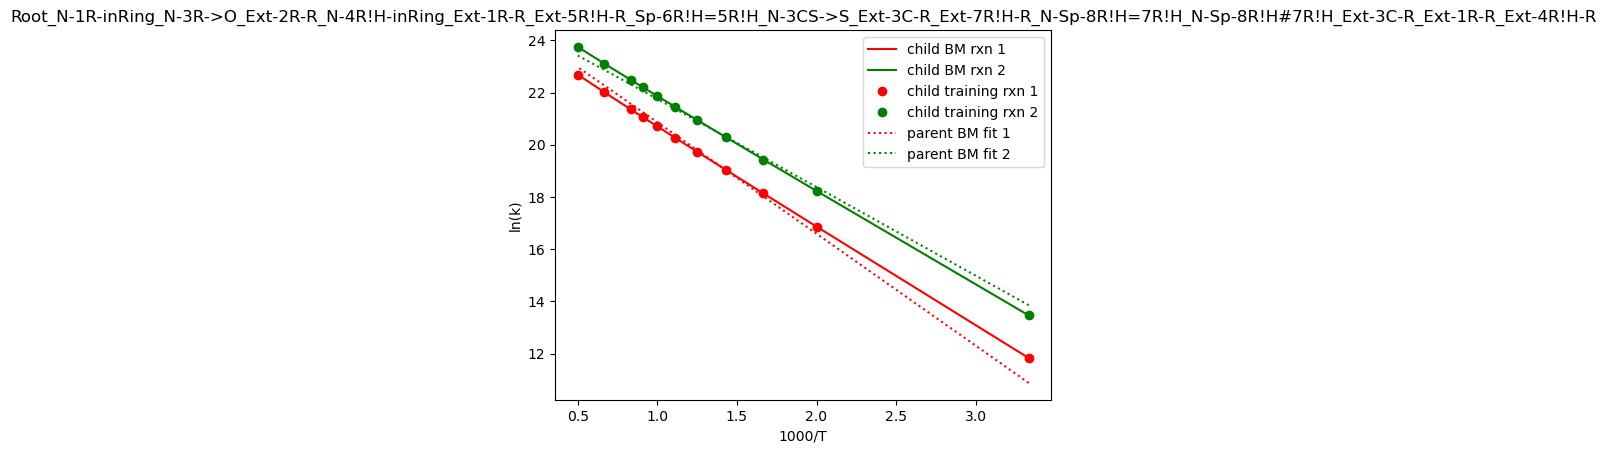

C10H15-79 <=> C10H15-80
C10H13-65 <=> C10H13-66
1.7e+11 s^-1 1.7e+11 s^-1


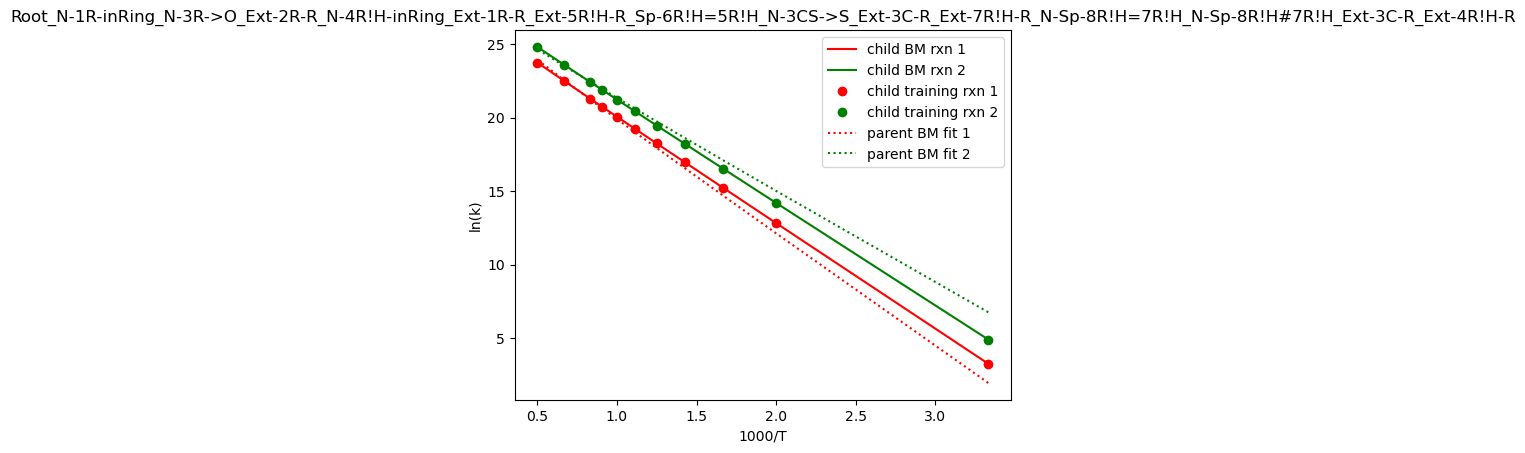

C10H15-65 <=> C10H15-66
C10H13-49 <=> C10H13-50
1.48e+09 s^-1 1.48e+09 s^-1


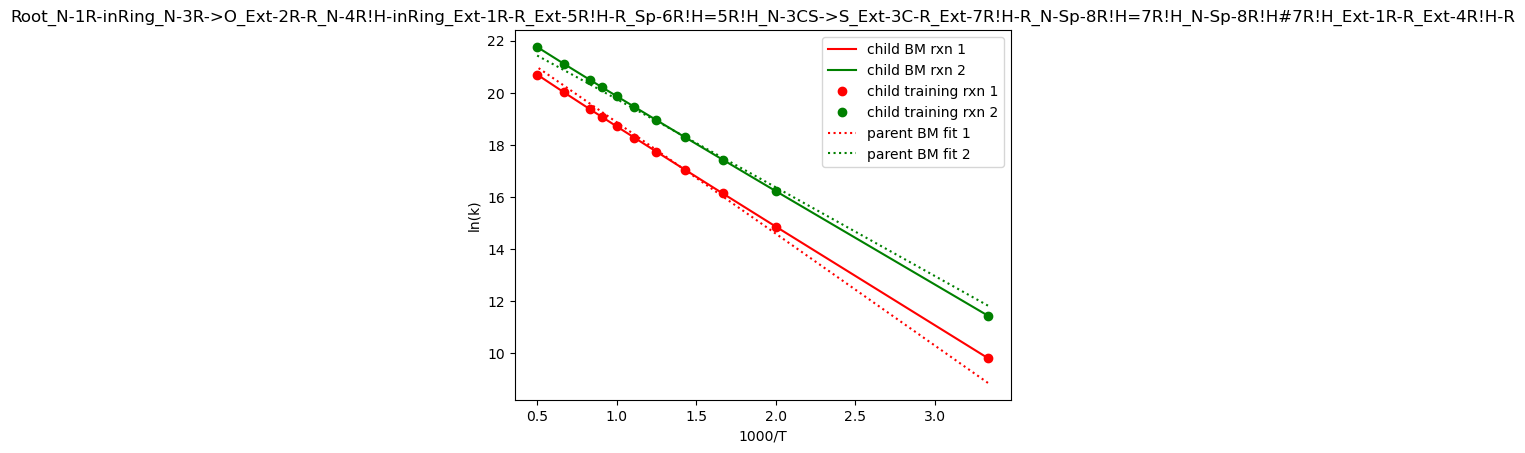

C9H13-71 <=> C9H13-72
C9H11-45 <=> C9H11-46
2.35e+10 s^-1 2.35e+10 s^-1


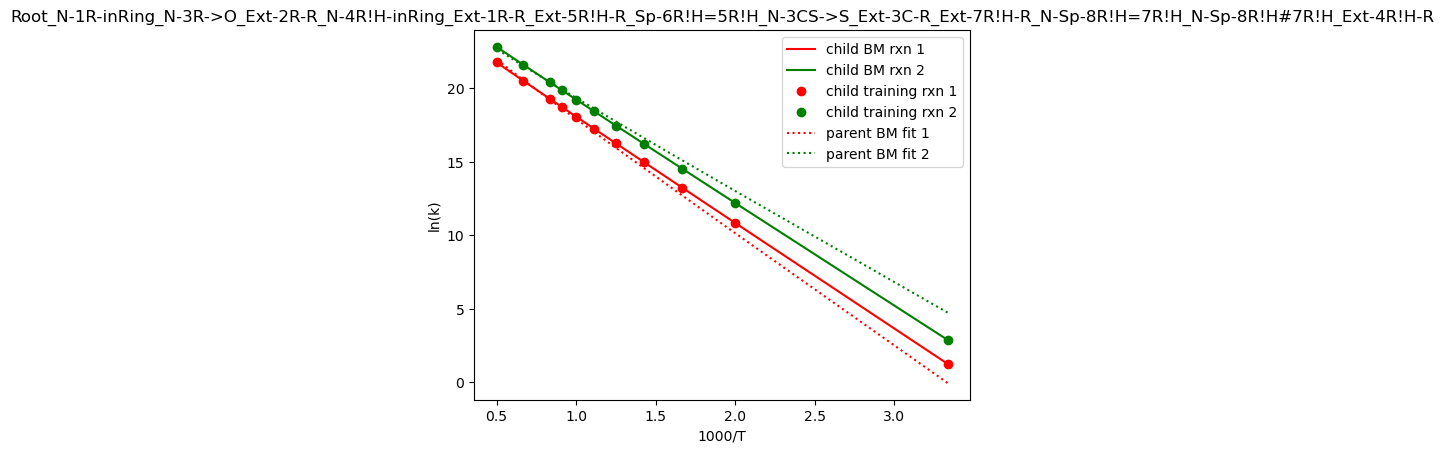

C8H13-37 <=> C8H13-38
C8H11-37 <=> C8H11-38
2.25e+10 s^-1 2.25e+10 s^-1


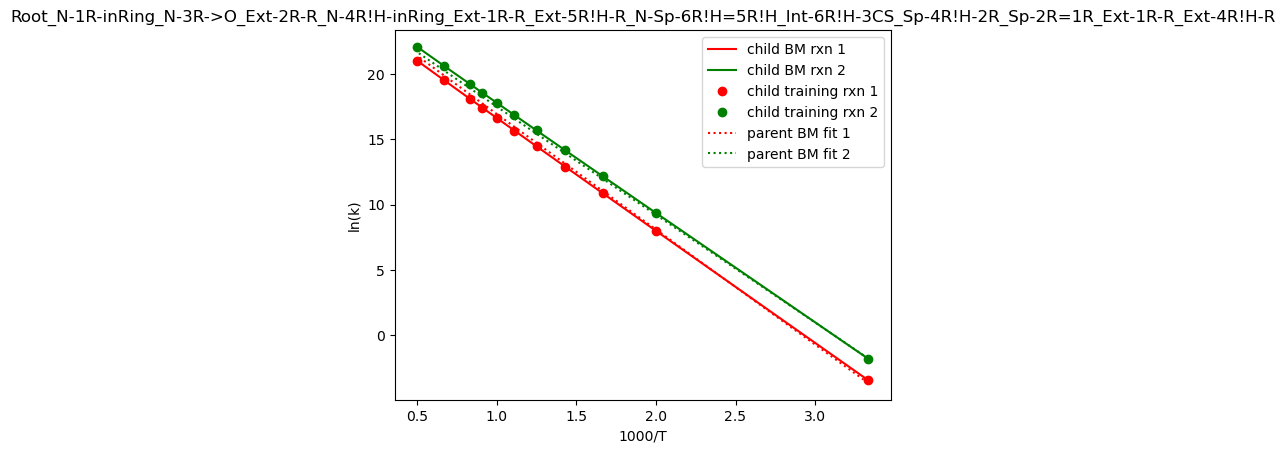

C7H11-17 <=> C7H11-18
C7H9-61 <=> C7H9-62
1.8e+10 s^-1 1.8e+10 s^-1


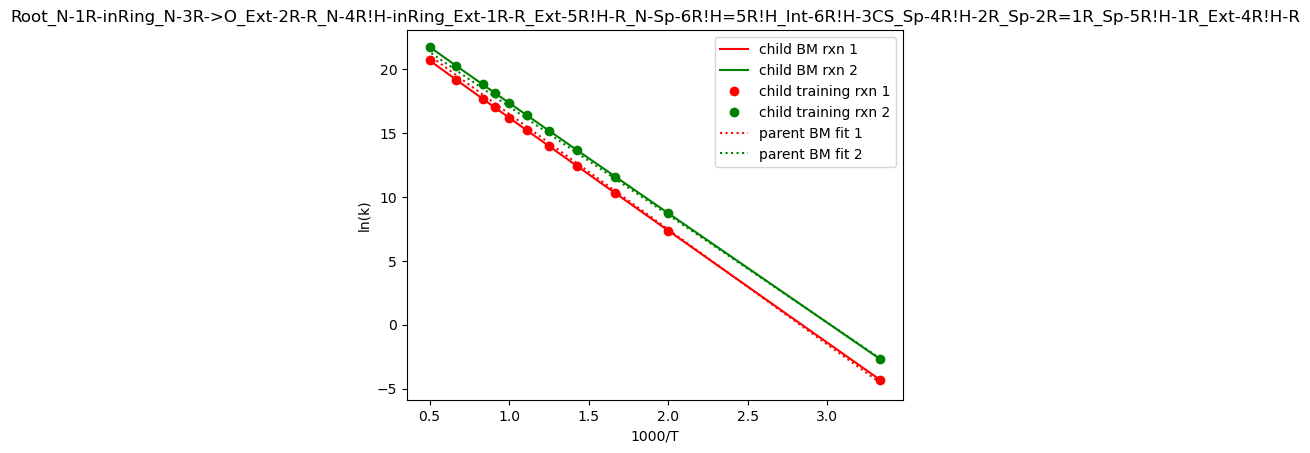

C7H9-9 <=> C7H9-10
C6H5O2-9 <=> C6H5O2-10
8.9e+10 s^-1 8.9e+10 s^-1


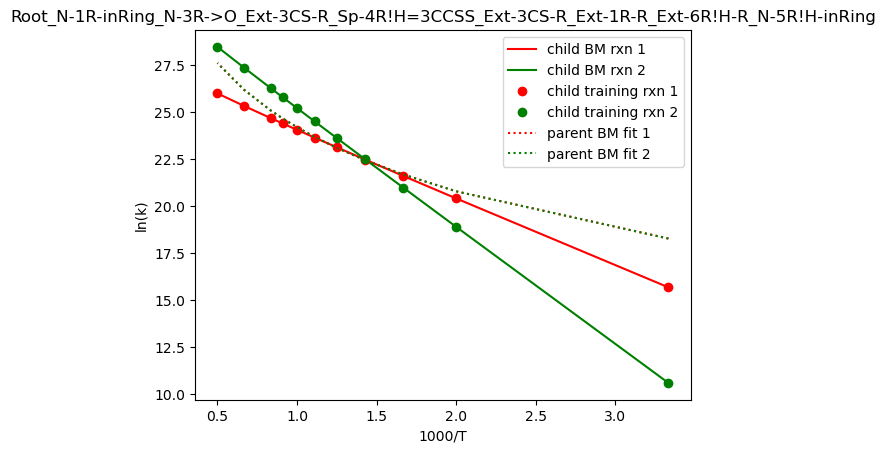

C7H5-3 <=> C7H5-4
C7H5-7 <=> C7H5-8
4.77e+12 s^-1 4.77e+12 s^-1


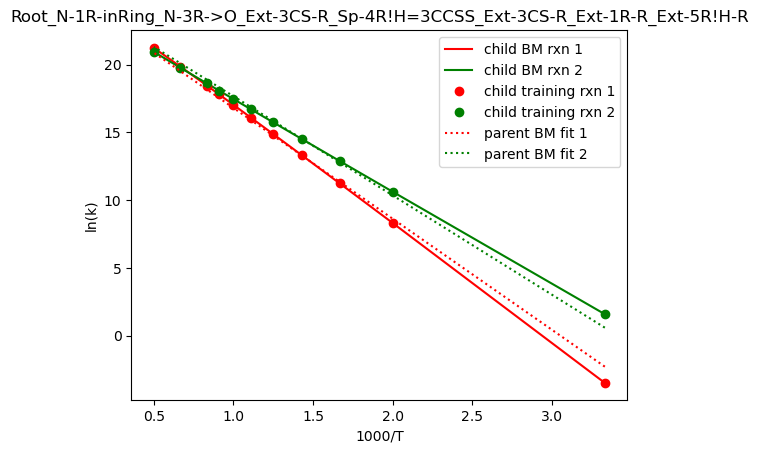

[CH]=CC(C#C)C#C <=> C7H5-9
[CH]=CC(=C=C)C#C <=> C7H5-15
1.24249e+09 s^-1 1.24249e+09 s^-1


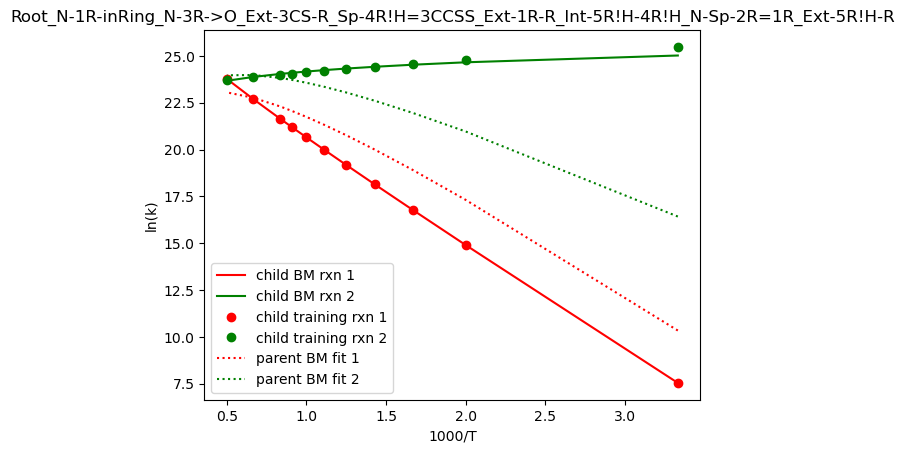

C10H9 <=> C10H9-2
C10H7-3 <=> C10H7-4
4.57e+10 s^-1 4.57e+10 s^-1


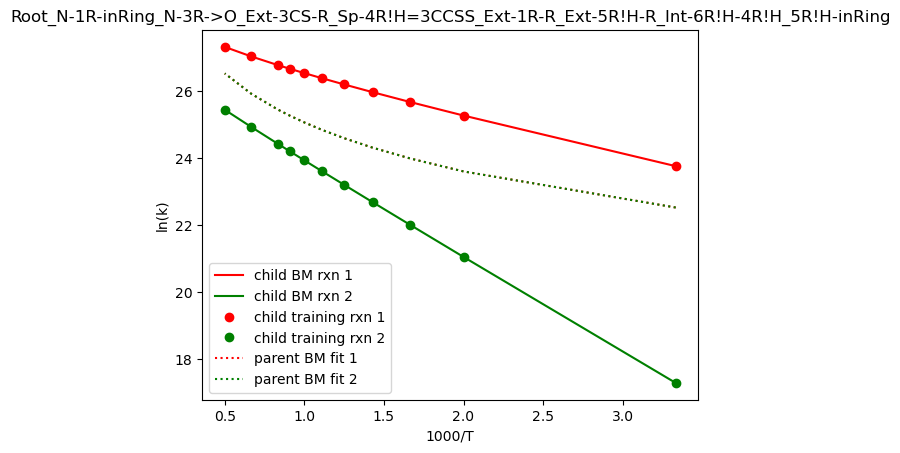

C10H11-35 <=> C10H11-36
C8H13 <=> C8H13-2
9.16e+10 s^-1 9.16e+10 s^-1


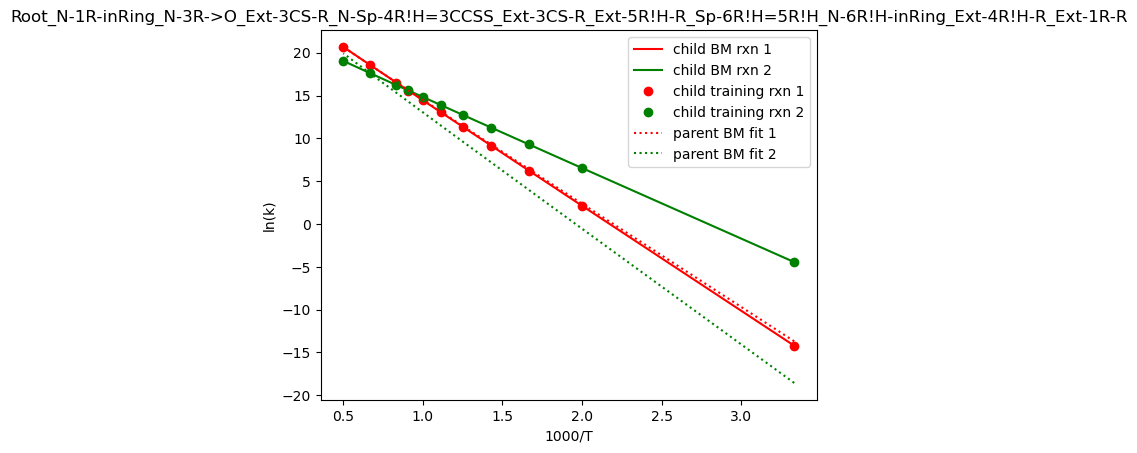

C10H7 <=> C10H7-2
C10H9-21 <=> C10H9-22
6.09e+08 s^-1 6.09e+08 s^-1


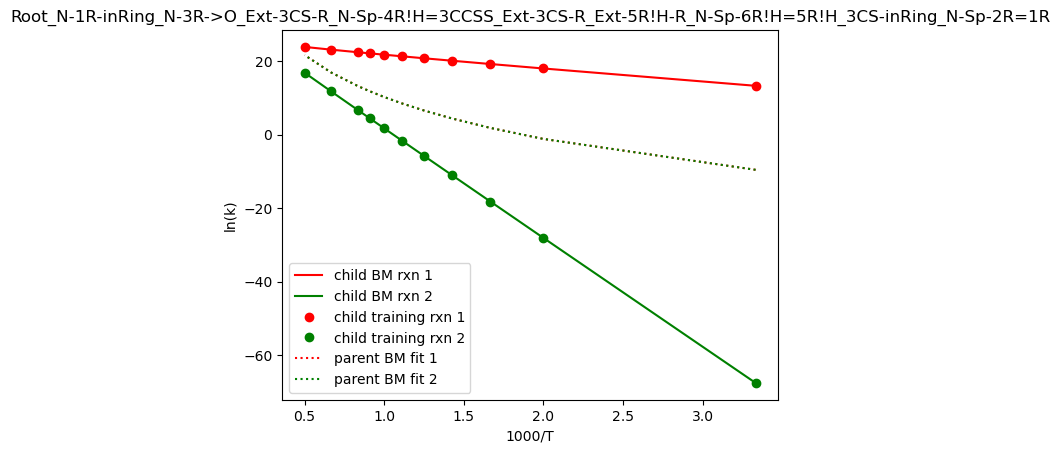

C10H9-9 <=> C10H9-10
C9H9-7 <=> C9H9-8
2.315e+10 s^-1 2.315e+10 s^-1


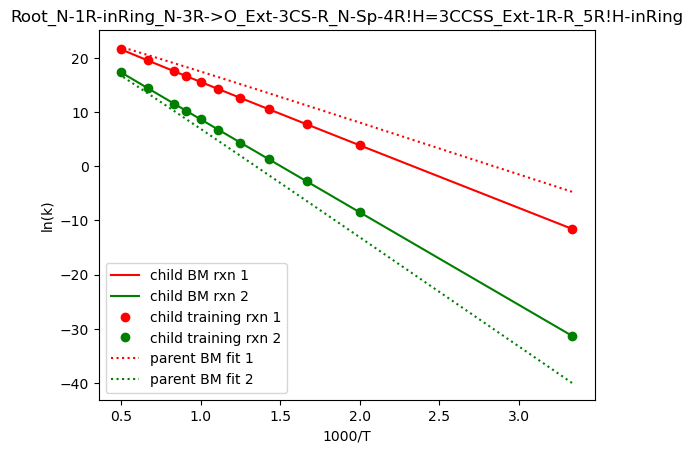

In [8]:
%matplotlib inline
temperatures = [ 300., 500.,  600.,  700. , 800.,  900., 1000., 1100., 1200., 1500., 2000.]
inverse_temps = [1000/T for T in temperatures]



for parent_label, children_labels in parent_to_child.items():
    
    training_rxns = templateRxnMap[parent_label] 
    for tr_rxn in training_rxns:
        print(tr_rxn)
    BM_entries = [family.retrieve_original_entry(label)[0].data for label in children_labels]

    matches = []
    matched_BM = []

    for BM_kinetics in BM_entries:
        for tr_rxn in training_rxns:
            BM_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(BM_kinetics.A.value_si)).group(1)
            tr_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(tr_rxn.kinetics.A.value_si)).group(1)
            if BM_str_of_float==tr_str_of_float:
                #print('yeah')
                matches.append((Reaction(reactants=tr_rxn.reactants, products=tr_rxn.products, kinetics = BM_kinetics), tr_rxn))
                matched_BM.append(BM_kinetics)
    if len(matches)==0:
        print("couldn't find any matches")
        continue
        #skipping because the A's are probably very different
        
    #if you miss matching all of them
    if len(matches)==1:
        leftover_tr_rxn = [tr_rxn for tr_rxn in training_rxns if tr_rxn not in matches[0]][0]
        leftover_BM_kinetics = [BM_kinetics for BM_kinetics in BM_entries if BM_kinetics not in matched_BM][0]
        leftover_BM_reaction = Reaction(reactants=leftover_tr_rxn.reactants, products=leftover_tr_rxn.products, kinetics = leftover_BM_kinetics)
        #print(leftover_BM_reaction.kinetics.A, leftover_tr_rxn.kinetics.A)
        matches.append((leftover_BM_reaction, leftover_tr_rxn))

#     for (BM, tr) in matches: 
#         print(str(BM.kinetics.A.value_si), str(tr.kinetics.A.value_si))
        
    child_node_1_BM_rxn, child_training_rxn_1= matches[0] 
    child_node_2_BM_rxn, child_training_rxn_2 = matches[1] 
    
    #empty lists for collecting data
    parent_node_rate_coefficients_1 = []
    parent_node_rate_coefficients_2 = []

    child_node_1_rate_coefficients = []
    child_node_2_rate_coefficients = []

    child_tr_rxn_coeffs_1 = []
    child_tr_rxn_coeffs_2 = []
    
    #let's make the parent BM node
    parent_node, _ = family.retrieve_original_entry(parent_label)
    BM_parent_rxn = Reaction(kinetics = parent_node.data)

    
    #get the dHrxns 
    
    dHrxn_1 = child_node_1_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_2 = child_node_2_BM_rxn.get_enthalpy_of_reaction(298)

    
    for temp in temperatures: 
        
        #calculate training rxn rate
        tr_rate_1 = child_training_rxn_1.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_2 =child_training_rxn_2.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap

        child_tr_rxn_coeffs_1.append(tr_rate_1)
        child_tr_rxn_coeffs_2.append(tr_rate_2)
        
        #calculate BM child rates
        BM_child_rate_1 = child_node_1_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1) #loaded in as BM kinetics 
        BM_child_rate_2 = child_node_2_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2) #loaded in as BM kinetics 

        child_node_1_rate_coefficients.append(BM_child_rate_1)
        child_node_2_rate_coefficients.append(BM_child_rate_2)
        
        #calculate BM for parent node at both dHrxns for child rxns
        BM_parent_node_rate_dH1 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1)
        parent_node_rate_coefficients_1.append(BM_parent_node_rate_dH1)
        BM_parent_node_rate_dH2 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2)
        parent_node_rate_coefficients_2.append(BM_parent_node_rate_dH2)
        
    
    #get lnks

    parent_node_1 = [np.log(rate) for rate in parent_node_rate_coefficients_1]
    parent_node_2 = [np.log(rate) for rate in parent_node_rate_coefficients_2]
    child_node_1 = [np.log(rate) for rate in child_node_1_rate_coefficients]  
    child_node_2 = [np.log(rate) for rate in child_node_2_rate_coefficients]
    child_tr_1 = [np.log(rate) for rate in child_tr_rxn_coeffs_1]
    child_tr_2 = [np.log(rate) for rate in child_tr_rxn_coeffs_2]


    print(child_node_1_BM_rxn.kinetics.A, child_training_rxn_1.kinetics.A)
    #plotting
    plt.figure()   
    plt.plot(inverse_temps, child_node_1, '-', c= 'r', label = 'child BM rxn 1')
    plt.plot(inverse_temps, child_node_2, '-', c= 'g', label = 'child BM rxn 2')
    plt.plot(inverse_temps, child_tr_1, 'o', c='r', label='child training rxn 1')
    plt.plot(inverse_temps, child_tr_2, 'o', c='g', label='child training rxn 2')
    plt.plot(inverse_temps, parent_node_1, ':', c='r', label = 'parent BM fit 1')   
    plt.plot(inverse_temps, parent_node_2, ':', c='g', label = 'parent BM fit 2')   


    plt.title(parent_label)
    plt.xlabel('1000/T')
    plt.ylabel('ln(k)')
    plt.legend()
    plt.show()

C11H13-29 <=> C11H13-30
C12H15-25 <=> C12H15-26
C11H11-9 <=> C11H11-10
C12H13-9 <=> C12H13-10
yeah
yeah
yeah
yeah
120000000000.0 120000000000.0
76400000000.0 76400000000.0
134000000000.0 134000000000.0
84900000000.0 84900000000.0
1.2e+11 s^-1 1.2e+11 s^-1


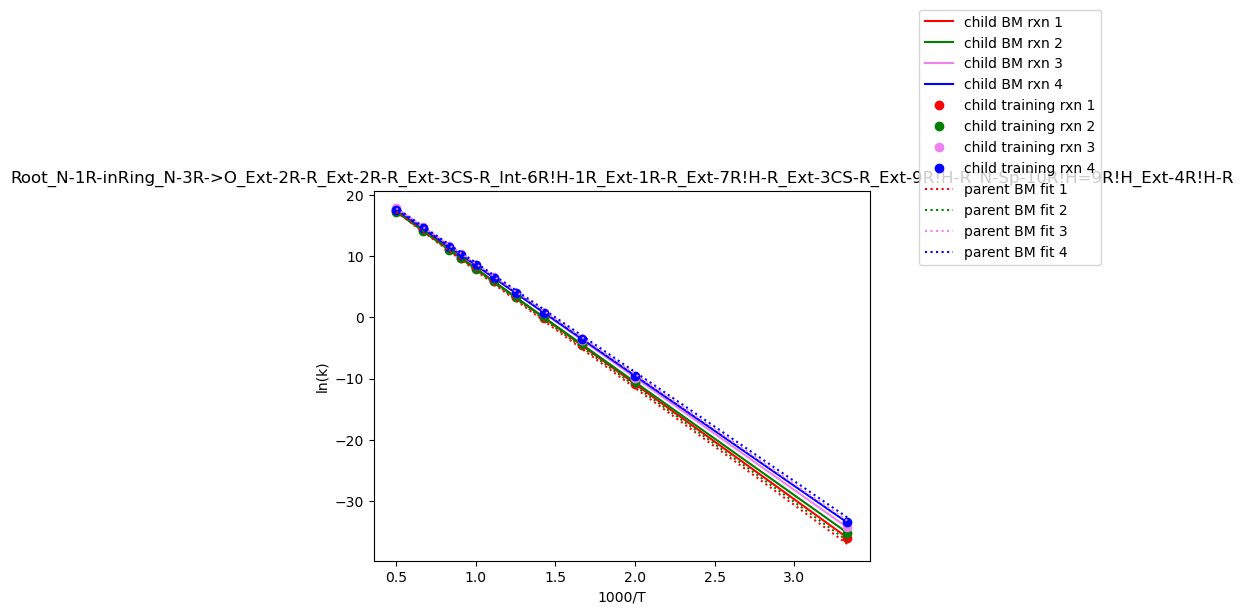

C10H13-29 <=> C10H13-30
C11H15-25 <=> C11H15-26
C10H11-57 <=> C10H11-58
C11H13-17 <=> C11H13-18
yeah
yeah
yeah
yeah
115000000000.0 115000000000.0
73100000000.0 73100000000.0
128000000000.0 128000000000.0
81300000000.0 81300000000.0
1.15e+11 s^-1 1.15e+11 s^-1


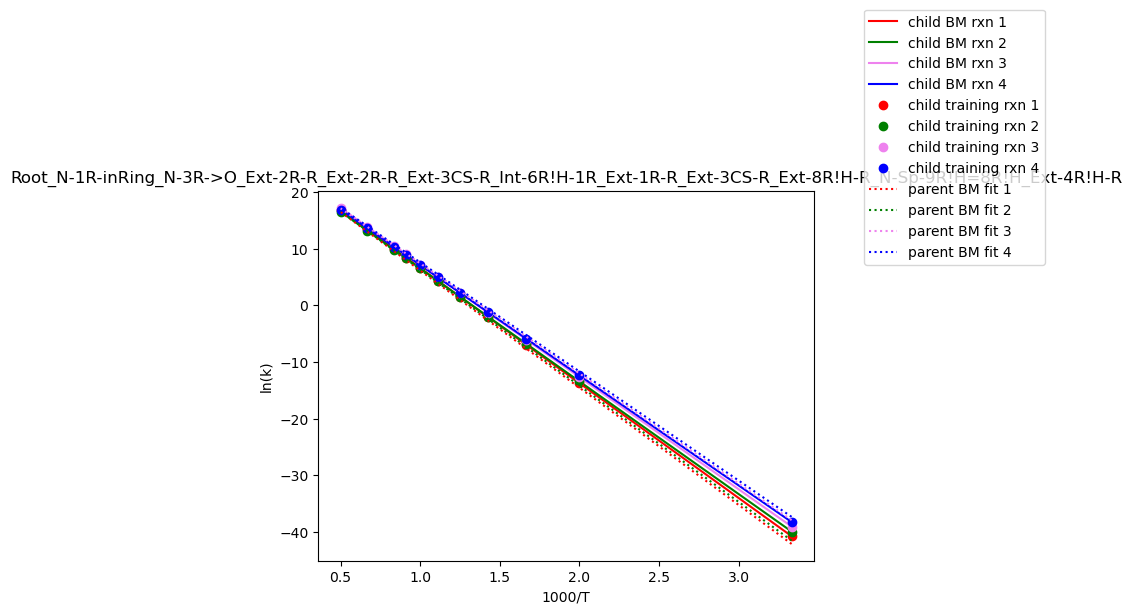

C9H13-13 <=> C9H13-14
C10H15-11 <=> C10H15-12
C9H11-13 <=> C9H11-14
C10H13-7 <=> C10H13-8
yeah
yeah
yeah
yeah
58200000000.0 58200000000.0
37000000000.0 37000000000.0
205000000000.0 205000000000.0
131000000000.0 131000000000.0
5.82e+10 s^-1 5.82e+10 s^-1


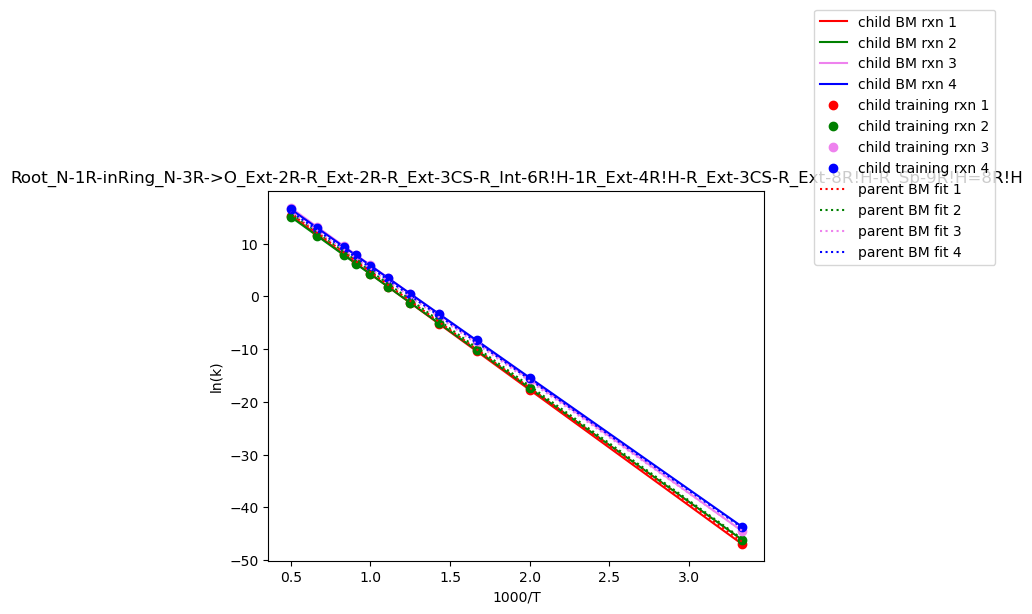

C9H11-9 <=> C9H11-10
C10H13-5 <=> C10H13-6
C9H9-11 <=> C9H9-12
C10H11-45 <=> C10H11-46
yeah
yeah
yeah
yeah
92100000000.0 92100000000.0
58500000000.0 58500000000.0
102000000000.0 102000000000.0
65000000000.0 65000000000.0
9.21e+10 s^-1 9.21e+10 s^-1


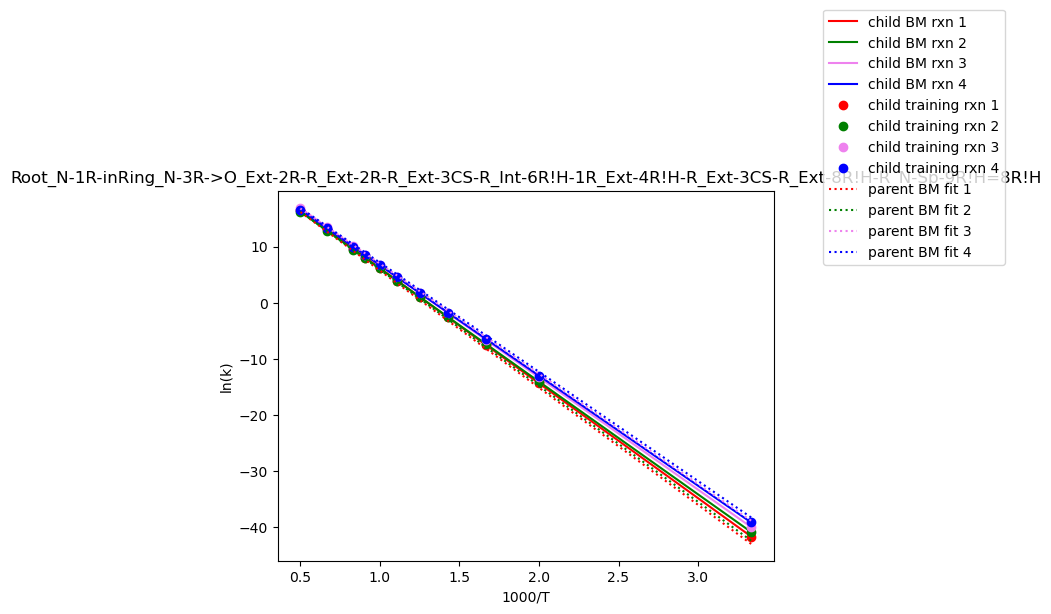

C11H17-49 <=> C11H17-50
C11H15-53 <=> C11H15-54
C10H15-81 <=> C10H15-82
C10H13-67 <=> C10H13-68
yeah
yeah
yeah
yeah
531000000.0 531000000.0
337000000.0 337000000.0
8420000000.0 8420000000.0
5350000000.0 5350000000.0
5.31e+08 s^-1 5.31e+08 s^-1


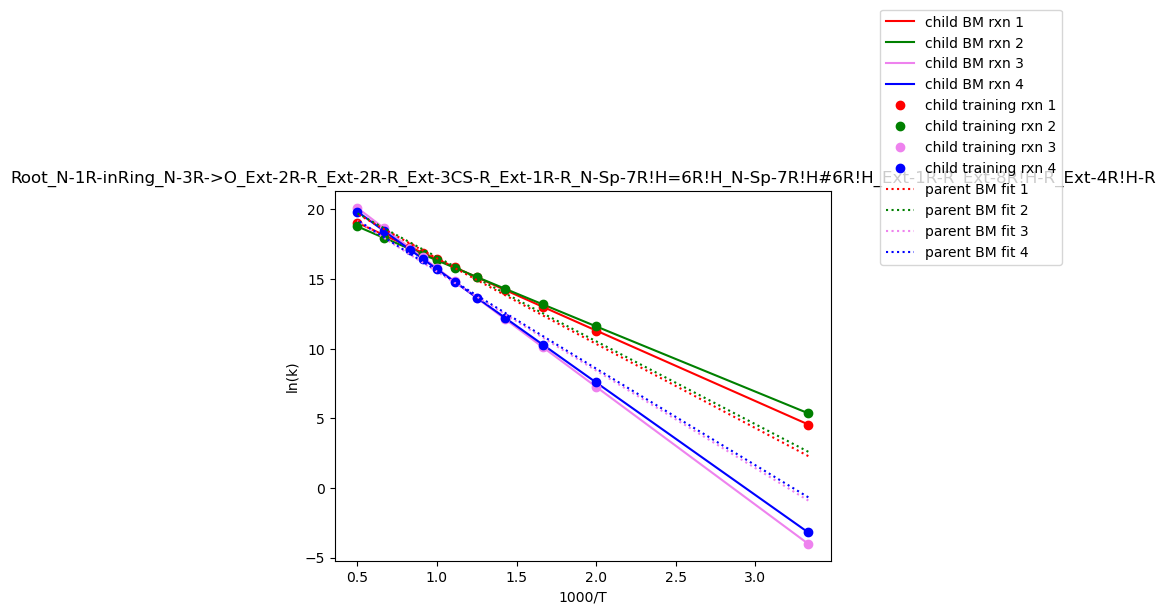

C12H17-5 <=> C12H17-6
C12H15-5 <=> C12H15-6
C13H19-5 <=> C13H19-6
C13H17-5 <=> C13H17-6
yeah
yeah
yeah
yeah
52100000000.0 52100000000.0
33100000000.0 33100000000.0
41600000000.0 41600000000.0
26500000000.0 26500000000.0
5.21e+10 s^-1 5.21e+10 s^-1


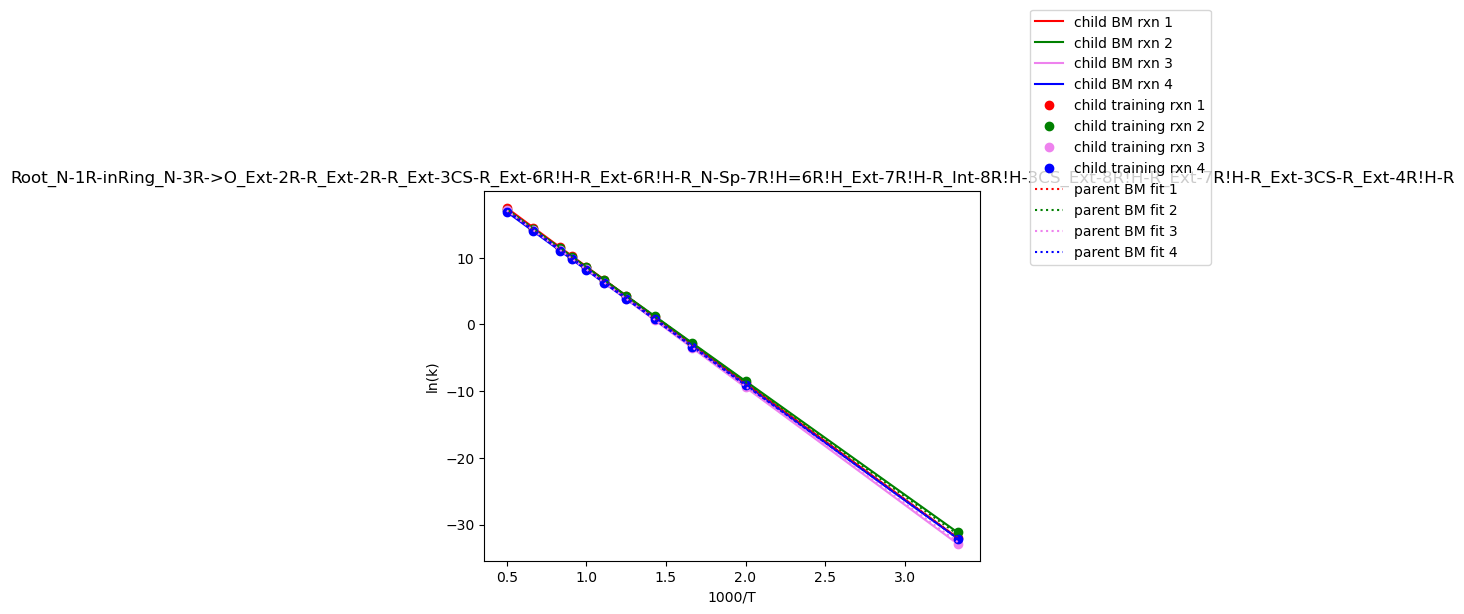

C11H15-17 <=> C11H15-18
C11H13-13 <=> C11H13-14
C12H17-23 <=> C12H17-24
C12H15-19 <=> C12H15-20
yeah
yeah
yeah
yeah
184000000000.0 184000000000.0
117000000000.0 117000000000.0
147000000000.0 147000000000.0
93500000000.0 93500000000.0
1.84e+11 s^-1 1.84e+11 s^-1


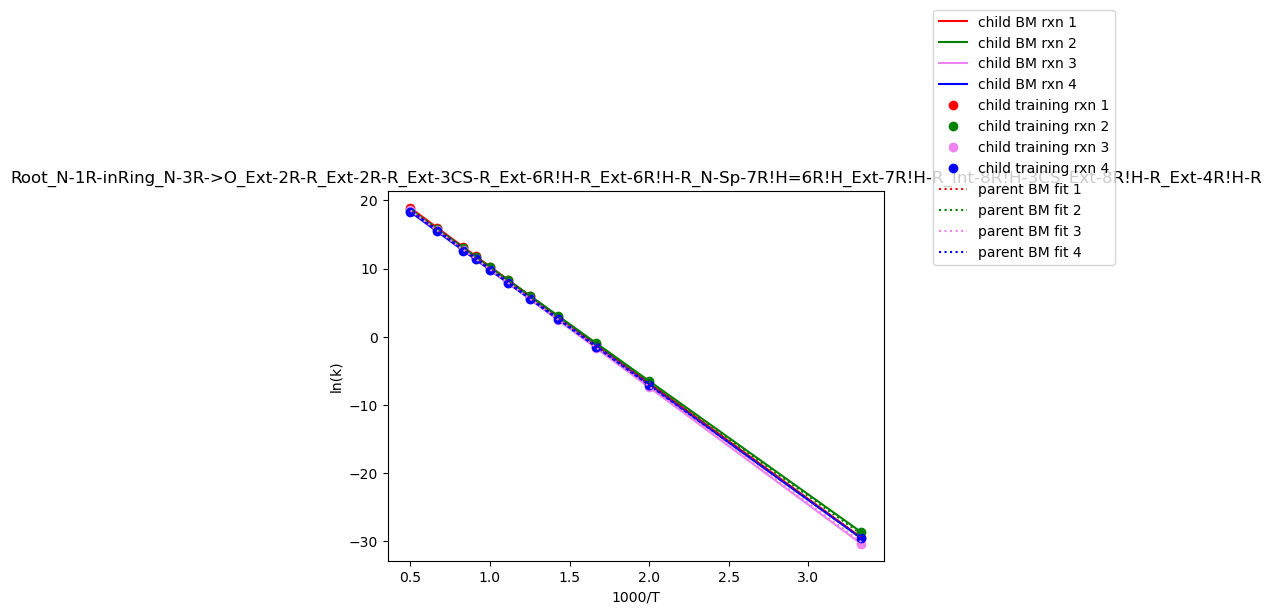

C11H17-13 <=> C11H17-14
C11H15-19 <=> C11H15-20
C12H19-15 <=> C12H19-16
C12H17-25 <=> C12H17-26
yeah
yeah
yeah
yeah
39500000000.0 39500000000.0
25100000000.0 25100000000.0
31600000000.0 31600000000.0
20100000000.0 20100000000.0
3.95e+10 s^-1 3.95e+10 s^-1


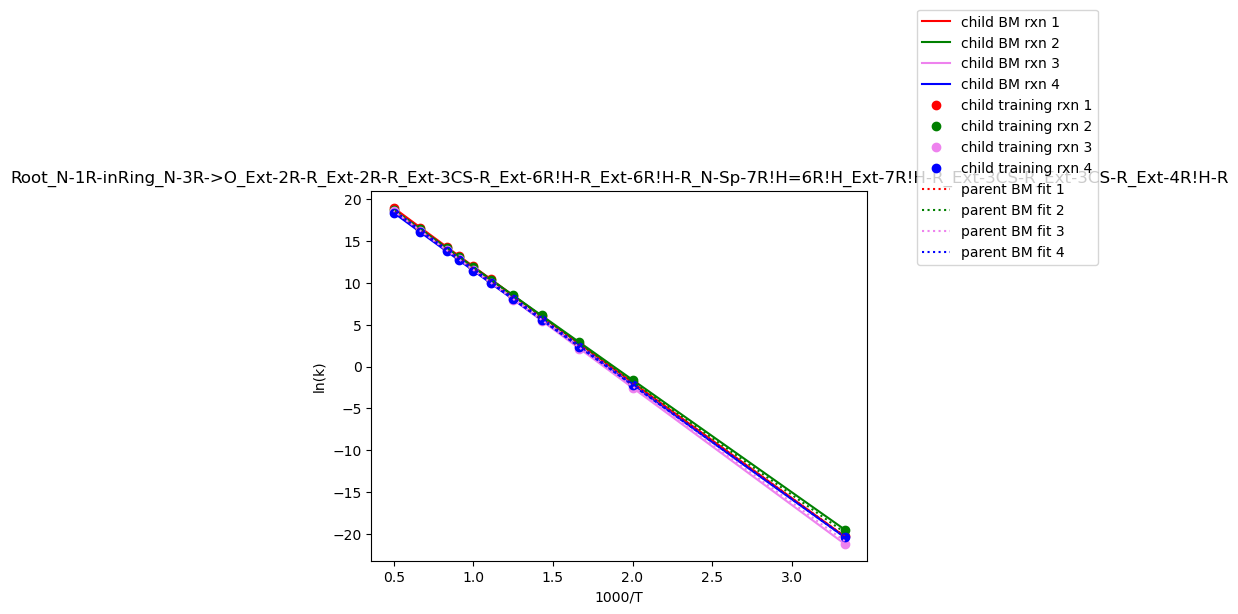

C10H15-27 <=> C10H15-28
C10H13-25 <=> C10H13-26
C11H17-41 <=> C11H17-42
C11H15-45 <=> C11H15-46
yeah
yeah
yeah
yeah
157000000000.0 157000000000.0
100000000000.0 100000000000.0
126000000000.0 126000000000.0
80000000000.0 80000000000.0
1.57e+11 s^-1 1.57e+11 s^-1


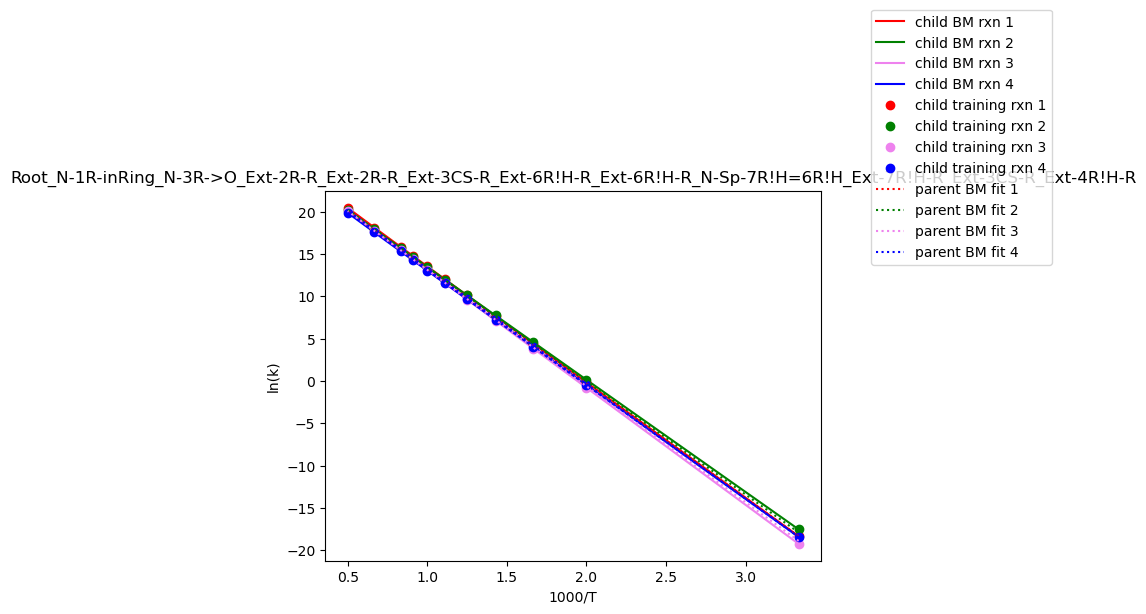

C9H13-33 <=> C9H13-34
C9H11-25 <=> C9H11-26
C10H15-61 <=> C10H15-62
C10H13-45 <=> C10H13-46
yeah
yeah
yeah
yeah
21700000000.0 21700000000.0
13800000000.0 13800000000.0
17400000000.0 17400000000.0
11000000000.0 11000000000.0
2.17e+10 s^-1 2.17e+10 s^-1


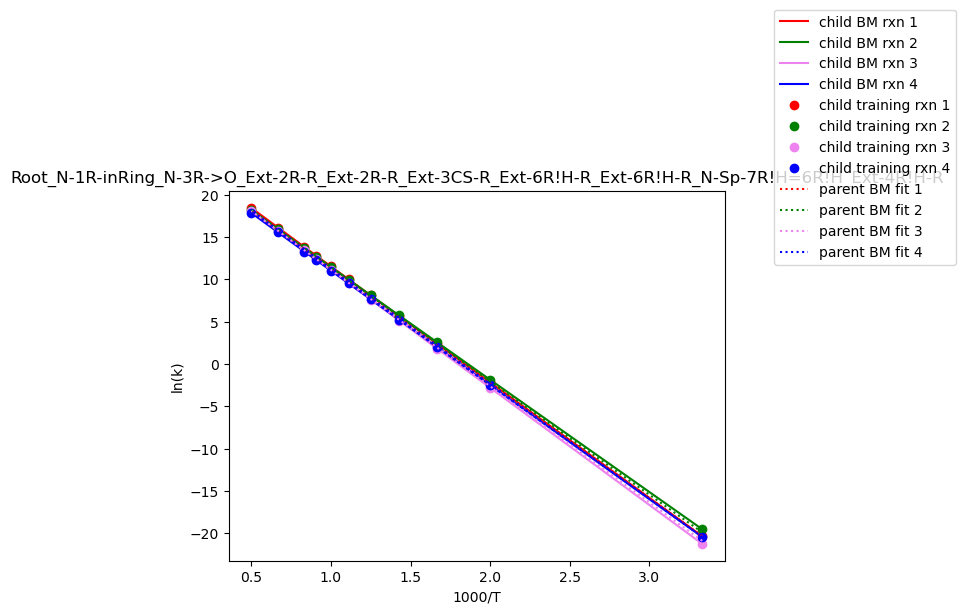

In [9]:
#n = 4, node with 4 reactions
%matplotlib inline
temperatures = [ 300., 500.,  600.,  700. , 800.,  900., 1000., 1100., 1200., 1500., 2000.]
inverse_temps = [1000/T for T in temperatures]



for parent_label, children_labels in parent_to_child_4.items():
    
    training_rxns = templateRxnMap[parent_label] 
    for tr_rxn in training_rxns:
        print(tr_rxn)
    BM_entries = [family.retrieve_original_entry(label)[0].data for label in children_labels]

    
    matches = []
    matched_BM = []
    matched_tr = []

    for BM_kinetics in BM_entries:
        for tr_rxn in training_rxns:
            BM_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(BM_kinetics.A.value_si)).group(1)
            tr_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(tr_rxn.kinetics.A.value_si)).group(1)
            if BM_str_of_float==tr_str_of_float:
                print('yeah')
                matches.append((Reaction(reactants=tr_rxn.reactants, products=tr_rxn.products, kinetics = BM_kinetics), tr_rxn))
                matched_BM.append(BM_kinetics)
                matched_tr.append(tr_rxn)
                
    if len(matches)==0:
        print("couldn't find any matches")
        continue
        #skipping because the A's are probably very different
        
    for (BM, tr) in matches:
        print(BM.kinetics.A.value_si, tr.kinetics.A.value_si)
        
#     if 0<len(matches)<len(training_rxns) and len(BM_entries)==len(training_rxns):
#         leftover_tr_rxns = [tr_rxn for tr_rxn in training_rxns if tr_rxn not in matched_tr]
#         leftover_BM_kinetics = [BM_kinetics for BM_kinetics in BM_entries if BM_kinetics not in matched_BM]
#         for leftover_tr_rxn in leftover_tr_rxns:
#             for leftover_BM_kinetics in leftover_BM_kinetics_:
#                 if re.search('([1-9]\.?[0-9][0-9])', str(leftover_BM_kinetics)).group(1)==re.search('([1-9]\.?[0-9][0-9])', str(leftover_tr_rxn.kinetics.A.value_si)).group(1):
#                     leftover_BM_reaction = Reaction(reactants=leftover_tr_rxn.reactants, products=leftover_tr_rxn.products, kinetics = leftover_BM_kinetics)
#                     print(leftover_BM_reaction.kinetics.A, leftover_tr_rxn.kinetics.A)
#                     matches.append((leftover_BM_reaction, leftover_tr_rxn))

    if len(BM_entries)!=len(matches):
        flag=False
    else:
        flag=True

    child_node_1_BM_rxn, child_training_rxn_1= matches[0] 
    child_node_2_BM_rxn, child_training_rxn_2 = matches[1] 
    child_node_3_BM_rxn, child_training_rxn_3= matches[2]
    if flag==True: 
        child_node_4_BM_rxn, child_training_rxn_4 = matches[3] 
    
    #empty lists for collecting data
    parent_node_rate_coefficients_1 = []
    parent_node_rate_coefficients_2 = []
    parent_node_rate_coefficients_3 = []
    parent_node_rate_coefficients_4 = []

    child_node_1_rate_coefficients = []
    child_node_2_rate_coefficients = []
    child_node_3_rate_coefficients = []
    child_node_4_rate_coefficients = []

    child_tr_rxn_coeffs_1 = []
    child_tr_rxn_coeffs_2 = []
    child_tr_rxn_coeffs_3 = []
    child_tr_rxn_coeffs_4 = []
    
    #let's make the parent BM node
    parent_node, _ = family.retrieve_original_entry(parent_label)
    BM_parent_rxn = Reaction(kinetics = parent_node.data)

    
    #get the dHrxns 
    
    dHrxn_1 = child_node_1_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_2 = child_node_2_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_3 = child_node_3_BM_rxn.get_enthalpy_of_reaction(298)
    if flag==True: 
        dHrxn_4 = child_node_4_BM_rxn.get_enthalpy_of_reaction(298)

    
    for temp in temperatures: 
        
        #calculate training rxn rate
        tr_rate_1 = child_training_rxn_1.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_2 =child_training_rxn_2.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_3 = child_training_rxn_3.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        if flag==True: 
            tr_rate_4 =child_training_rxn_4.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap

        child_tr_rxn_coeffs_1.append(tr_rate_1)
        child_tr_rxn_coeffs_2.append(tr_rate_2)
        child_tr_rxn_coeffs_3.append(tr_rate_3)
        if flag==True:
            child_tr_rxn_coeffs_4.append(tr_rate_4)
        
        #calculate BM child rates
        BM_child_rate_1 = child_node_1_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1) #loaded in as BM kinetics 
        BM_child_rate_2 = child_node_2_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2) #loaded in as BM kinetics 
        BM_child_rate_3 = child_node_3_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_3) #loaded in as BM kinetics 
        if flag==True:
            BM_child_rate_4 = child_node_4_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_4) #loaded in as BM kinetics 

        child_node_1_rate_coefficients.append(BM_child_rate_1)
        child_node_2_rate_coefficients.append(BM_child_rate_2)
        child_node_3_rate_coefficients.append(BM_child_rate_3)
        if flag==True:
            child_node_4_rate_coefficients.append(BM_child_rate_4)
        
        #calculate BM for parent node at both dHrxns for child rxns
        BM_parent_node_rate_dH1 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1)
        parent_node_rate_coefficients_1.append(BM_parent_node_rate_dH1)
        BM_parent_node_rate_dH2 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2)
        parent_node_rate_coefficients_2.append(BM_parent_node_rate_dH2)
        BM_parent_node_rate_dH3 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_3)
        parent_node_rate_coefficients_3.append(BM_parent_node_rate_dH3)
        if flag==True:
            BM_parent_node_rate_dH4 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_4)
            parent_node_rate_coefficients_4.append(BM_parent_node_rate_dH4)
        
    
    #get lnks

    parent_node_1 = [np.log(rate) for rate in parent_node_rate_coefficients_1]
    parent_node_2 = [np.log(rate) for rate in parent_node_rate_coefficients_2]
    parent_node_3 = [np.log(rate) for rate in parent_node_rate_coefficients_3]
    if flag==True:
        parent_node_4 = [np.log(rate) for rate in parent_node_rate_coefficients_4]
    
    child_node_1 = [np.log(rate) for rate in child_node_1_rate_coefficients]  
    child_node_2 = [np.log(rate) for rate in child_node_2_rate_coefficients]
    child_node_3 = [np.log(rate) for rate in child_node_3_rate_coefficients]  
    if flag==True:
        child_node_4 = [np.log(rate) for rate in child_node_4_rate_coefficients]
    
    child_tr_1 = [np.log(rate) for rate in child_tr_rxn_coeffs_1]
    child_tr_2 = [np.log(rate) for rate in child_tr_rxn_coeffs_2]
    child_tr_3 = [np.log(rate) for rate in child_tr_rxn_coeffs_3]
    if flag==True:
        child_tr_4 = [np.log(rate) for rate in child_tr_rxn_coeffs_4]


    print(child_node_1_BM_rxn.kinetics.A, child_training_rxn_1.kinetics.A)
    #plotting
    plt.figure()   
    plt.plot(inverse_temps, child_node_1, '-', c= 'r', label = 'child BM rxn 1')
    plt.plot(inverse_temps, child_node_2, '-', c= 'g', label = 'child BM rxn 2')
    plt.plot(inverse_temps, child_node_3, '-', c= 'violet', label = 'child BM rxn 3')
    if flag==True:
        plt.plot(inverse_temps, child_node_4, '-', c= 'b', label = 'child BM rxn 4')
    
    plt.plot(inverse_temps, child_tr_1, 'o', c='r', label='child training rxn 1')
    plt.plot(inverse_temps, child_tr_2, 'o', c='g', label='child training rxn 2')
    plt.plot(inverse_temps, child_tr_3, 'o', c='violet', label='child training rxn 3')
    if flag==True:
        plt.plot(inverse_temps, child_tr_4, 'o', c='b', label='child training rxn 4')
    
    plt.plot(inverse_temps, parent_node_1, ':', c='r', label = 'parent BM fit 1')   
    plt.plot(inverse_temps, parent_node_2, ':', c='g', label = 'parent BM fit 2')
    plt.plot(inverse_temps, parent_node_3, ':', c='violet', label = 'parent BM fit 3')   
    if flag==True:
        plt.plot(inverse_temps, parent_node_4, ':', c='b', label = 'parent BM fit 4')


    plt.title(parent_label)
    plt.xlabel('1000/T')
    plt.ylabel('ln(k)')
    plt.legend(loc=(1.1,0.8))
    plt.show()